## Load Datasets

In [1]:
import pandas as pd
import geopandas as gpd

# Define paths to the files
data_paths = {
    "2020_official_general_voter_turnout": r"D:\OSNA\Project\2020-official-general-voter-turnout.xlsx",
    "2024_election_reg_congressional": r"D:\OSNA\Project\2024 General Election Day Voter Registration by Congressional Voting District.xlsx",
    "2024_election_reg_county": r"D:\OSNA\Project\2024 General Election Day Voter Registration by County.xlsx",
    "congressional_district_by_county": r"D:\OSNA\Project\congressional-district-by-county-2022.xlsx",
    "elections_2024": r"D:\OSNA\Project\elections-2024-11-01T12_27_30.csv",
    "nov_2024_voter_reg_congressional": r"D:\OSNA\Project\November 2024 Voter Registration by Congressional Voting District.xlsx",
    "nov_2024_voter_reg_county": r"D:\OSNA\Project\November 2024 Voter Registration by County.xlsx",
    "household_income": r"C:\Users\finof\Downloads\household income.csv",
    "occupancy_housing": r"C:\Users\finof\Downloads\occupancy of housing.csv",
    "population_age_range": r"C:\Users\finof\Downloads\population by age range.csv",
    "population_education": r"C:\Users\finof\Downloads\population by highest level of education.csv",
    "race_ethnicity": r"C:\Users\finof\Downloads\Race and ethnicity.xlsx",
    "l2_data_dictionary": r"C:\Users\finof\Downloads\NJ_l2_2022stats_county\L2_Individual_Level_Data_Dictionary_20210721.xlsx",
    "nj_l2_2022_stats_county": r"C:\Users\finof\Downloads\NJ_l2_2022stats_county\NJ_l2_2022stats_county.csv",
    "nj_l2_2023_stats_county": r"C:\Users\finof\Downloads\NJ_l2_2023stats_county\NJ_l2_2023stats_county.csv",
    "nj_cvap_2021_cnty": r"C:\Users\finof\Downloads\nj_cvap_2021_cnty\nj_cvap_2021_cnty.csv"
}


# Function to load data based on file extension
def load_data(filepath):
    if filepath.endswith('.csv'):
        return pd.read_csv(filepath)
    elif filepath.endswith('.xlsx'):
        return pd.read_excel(filepath)
    else:
        raise ValueError("Unsupported file format")

# Load all datasets into a dictionary
datasets = {name: load_data(path) for name, path in data_paths.items()}

# Now, datasets is a dictionary where keys are dataset names and values are DataFrames


## Data Preprocessing

In [2]:
# datasets is a dictionary with dataset names as keys and DataFrames as values.

# Data preprocessing function
def preprocess_datasets(datasets):
    preprocessed_data = {}
    
    # Example preprocessing steps
    for name, df in datasets.items():
        print(f"Processing dataset: {name}")
        
        # General cleaning
        df = df.copy()
        
        # Drop completely empty columns
        df = df.dropna(how='all', axis=1)
        
        # Drop completely empty rows
        df = df.dropna(how='all', axis=0)
        
        # Standardize column names
        df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'[^\w]', '')
        
        # Fill missing values (if relevant)
        df = df.fillna(0)  # Replace with appropriate strategy if needed
        
        # Keep the cleaned dataset
        preprocessed_data[name] = df
    
    return preprocessed_data

# Preprocess all datasets
cleaned_datasets = preprocess_datasets(datasets)

# Analyze the datasets
def analyze_datasets(datasets):
    for name, df in datasets.items():
        print(f"Dataset: {name}")
        print(f"Shape: {df.shape}")
        print(f"Columns: {list(df.columns)}")
        print(f"Sample data:\n{df.head()}\n")

# Perform analysis
analyze_datasets(cleaned_datasets)

# Merge datasets for NJ 7th Congressional District analysis
def merge_datasets_for_analysis(cleaned_data):
    # Example merge: Join voter registration with demographic data(population_age_range)
    # Adjust keys and join conditions based on actual data structure
    voter_registration = cleaned_data['2024_election_reg_congressional']
    demographics = cleaned_data['population_age_range']
    merged = pd.merge(voter_registration, demographics, left_on='districts', right_on='name', how='inner')
    
    # Further merge as needed with other datasets (e.g., income, ethnicity)
    income_data = cleaned_data['household_income']
    merged = pd.merge(merged, income_data, on='geoid', how='left')
    
    return merged

# Merge datasets for analysis
merged_data = merge_datasets_for_analysis(cleaned_datasets)

# Save preprocessed data for feature extraction
merged_data.to_csv(r'D:\OSNA\Project\preprocessed_data_for_nj7.csv', index=False)
print("Preprocessed data saved.")


Processing dataset: 2020_official_general_voter_turnout
Processing dataset: 2024_election_reg_congressional
Processing dataset: 2024_election_reg_county
Processing dataset: congressional_district_by_county
Processing dataset: elections_2024
Processing dataset: nov_2024_voter_reg_congressional
Processing dataset: nov_2024_voter_reg_county
Processing dataset: household_income
Processing dataset: occupancy_housing
Processing dataset: population_age_range
Processing dataset: population_education
Processing dataset: race_ethnicity
Processing dataset: l2_data_dictionary
Processing dataset: nj_l2_2022_stats_county
Processing dataset: nj_l2_2023_stats_county
Processing dataset: nj_cvap_2021_cnty
Dataset: 2020_official_general_voter_turnout
Shape: (22, 6)
Columns: ['county', 'total_number_of_registered_voters', 'total_number_of_ballots_cast', 'total_number_of_ballots_rejected', 'percent_of_ballots_cast', 'number_of_election_districts']
Sample data:
       county  total_number_of_registered_vote

In [3]:
import pandas as pd

# Load the Excel files
congressional_districts = pd.read_excel(r"D:\OSNA\Project\congressional-district-by-county-2022.xlsx")
voter_turnout = pd.read_excel(r"D:\OSNA\Project\2020-official-general-voter-turnout.xlsx")

# Ensure column names are consistent and trimmed (if there are spaces)
congressional_districts.columns = congressional_districts.columns.str.strip()
voter_turnout.columns = voter_turnout.columns.str.strip()

# Extract counties in the 7th Congressional District
district_7_counties = congressional_districts.loc[congressional_districts['Congressional Districts'] == '7th', 'County']
# Convert the comma-separated counties into a list
district_7_counties = district_7_counties.iloc[0].split(', ')

# Filter voter turnout data for only the counties in NJ's 7th District
columns_of_interest = [
    'COUNTY', 
    'Total Number of Registered Voters', 
    'Total Number of Ballots Cast', 
    'Total Number of Ballots Rejected', 
    'Percent of Ballots Cast', 
    'Number of Election Districts'
]

nj7th_data = voter_turnout.loc[voter_turnout['COUNTY'].isin(district_7_counties), columns_of_interest]

# Ensure the Percent of Ballots Cast is in a numerical format (convert percentage strings to decimals if necessary)
if nj7th_data['Percent of Ballots Cast'].dtype == object:
    nj7th_data['Percent of Ballots Cast'] = nj7th_data['Percent of Ballots Cast'].str.rstrip('%').astype(float) / 100

# Save the filtered NJ7th data to a CSV file in the exact desired format
nj7th_data.to_csv('nj7th_filtered_data.csv', index=False)
print(nj7th_data)

# Display a confirmation message
print("Filtered NJ's 7th District Data Saved to 'nj7th_filtered_data.csv'")


       COUNTY  Total Number of Registered Voters  \
9   Hunterdon                              98982   
13     Morris                             389909   
17   Somerset                             256911   
18     Sussex                             114553   
19      Union                             372854   
20     Warren                              85806   

    Total Number of Ballots Cast  Total Number of Ballots Rejected  \
9                          85107                               714   
13                        305874                              2130   
17                        189727                              2841   
18                         88857                              1056   
19                        258344                              6765   
20                         61598                              1331   

    Percent of Ballots Cast  Number of Election Districts  
9                      0.86                           116  
13                     0

In [5]:
import numpy as np
import pandas as pd

## -- Load and Preprocess Data -- ##

# Load presidential election data
pres_allRecords = pd.read_csv('./countypres_2000-2020.csv')

# Calculate percentage of total votes for each candidate
pres_allRecords['percentOfTotal'] = pres_allRecords['candidatevotes'] / pres_allRecords['totalvotes']

# Print unique voting modes and states
print("Unique Voting Modes:\n", pres_allRecords['mode'].unique())
print("Unique States:\n", pres_allRecords['state'].unique())

# Filter for specific voting methods (Early Voting, Mail Voting, Absentee, etc.)
pres_earlyVote = pres_allRecords[pres_allRecords['mode'].isin(['EARLY VOTE', 'EARLY VOTING', 'EARLY', 'MAIL', 'ABSENTEE', 
                                                               'IN-PERSON ABSENTEE', '2ND ABSENTEE'])]

pres_electionDay = pres_allRecords[pres_allRecords['mode'] == 'ELECTION DAY']

# Filter for battleground states
battlegrounds = ['FLORIDA', 'GEORGIA', 'IOWA', 'MAINE', 'MICHIGAN', 'NEVADA', 'NEW HAMPSHIRE', 
                 'NORTH CAROLINA', 'OHIO', 'PENNSYLVANIA', 'WISCONSIN']

# Remove duplicate records
pres_allRecords = pres_allRecords[~pres_allRecords.index.duplicated()]
pres_allRecords.reset_index(inplace=True)

# Replace numeric years with strings for consistency
pres_allRecords['year'].replace({
    2000: '2000',
    2004: '2004',
    2008: '2008',
    2012: '2012',
    2016: '2016',
    2020: '2020'
}, inplace=True)

## -- Analyze and Summarize Data -- ##

# 1. Analyze Voting Methods Over Time
print("\n--- Analysis: Voting Methods Over Time ---")
voting_methods_summary = pres_allRecords.groupby(['year', 'mode'])['candidatevotes'].sum().unstack().fillna(0)
voting_methods_summary['TOTAL'] = voting_methods_summary.sum(axis=1)
print(voting_methods_summary)

# 2. Identify Swing States (Narrow Margins)
print("\n--- Analysis: Swing States ---")
swing_state_summary = pres_allRecords[pres_allRecords['state'].isin(battlegrounds)]
swing_state_margins = swing_state_summary.groupby(['state', 'year', 'party'])['candidatevotes'].sum().unstack()
swing_state_margins['Margin'] = swing_state_margins['REPUBLICAN'] - swing_state_margins['DEMOCRAT']
print(swing_state_margins)

# 3. Analyze Party Trends Over Time
print("\n--- Analysis: Party Performance Trends ---")
party_trends = pres_allRecords.groupby(['year', 'party'])['candidatevotes'].sum().unstack().fillna(0)
party_trends['TOTAL'] = party_trends.sum(axis=1)
print(party_trends)

# 4. Forecast Insights for Battleground States
print("\n--- Forecast Insights: Battleground States ---")
battleground_trends = pres_allRecords[pres_allRecords['state'].isin(battlegrounds)].groupby(['state', 'year', 'party'])['percentOfTotal'].mean().unstack()
battleground_trends['Swing'] = battleground_trends['REPUBLICAN'] - battleground_trends['DEMOCRAT']
print(battleground_trends)

## -- Visualization Insights (Optional) -- ##
# Add visualizations if needed (e.g., matplotlib, seaborn) to display party trends, voting methods, and battleground swings.

## -- Population Analysis -- ##

# Load and preprocess population data
population_data_raw = pd.read_excel('./populationData_2020_2022.xlsx')
population_data_raw.columns = ['Location', 'April2020', 'July2020', 'July2021', 'July2022']

# Clean and normalize location names
population_data_raw = population_data_raw[4:-5]
population_data_raw['Location'] = population_data_raw['Location'].replace(['\.', ' County', ' Parish'], '', regex=True).str.strip().str.upper()
population_data_raw[['County', 'State']] = population_data_raw['Location'].str.split(',', expand=True)

# Calculate percentage population change
population_data_raw['percentChange'] = (population_data_raw['July2022'] / population_data_raw['July2020']) - 1
print("\n--- Population Change (2020–2022) ---")
print(population_data_raw[['County', 'State', 'percentChange']].sort_values(by='percentChange', ascending=False))

# Insights: Correlate population change with swing in election margins (if required)



Unique Voting Modes:
 ['TOTAL' 'EARLY VOTE' 'ELECTION DAY' 'PROVISIONAL' 'ABSENTEE'
 'ADVANCED VOTING' 'PROV' 'ABSENTEE BY MAIL' 'ONE STOP' 'FAILSAFE'
 'FAILSAFE PROVISIONAL' 'IN-PERSON ABSENTEE' '2ND ABSENTEE' 'EARLY VOTING'
 'EARLY' 'MAIL']
Unique States:
 ['ALABAMA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO' 'CONNECTICUT'
 'DELAWARE' 'DISTRICT OF COLUMBIA' 'FLORIDA' 'GEORGIA' 'HAWAII' 'IDAHO'
 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY' 'LOUISIANA' 'MAINE'
 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA' 'MISSISSIPPI'
 'MISSOURI' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW HAMPSHIRE' 'NEW JERSEY'
 'NEW MEXICO' 'NEW YORK' 'NORTH CAROLINA' 'NORTH DAKOTA' 'OHIO' 'OKLAHOMA'
 'OREGON' 'PENNSYLVANIA' 'RHODE ISLAND' 'SOUTH CAROLINA' 'SOUTH DAKOTA'
 'TENNESSEE' 'TEXAS' 'UTAH' 'VERMONT' 'VIRGINIA' 'WASHINGTON'
 'WEST VIRGINIA' 'WISCONSIN' 'WYOMING' 'ALASKA']

--- Analysis: Voting Methods Over Time ---
mode  2ND ABSENTEE   ABSENTEE  ABSENTEE BY MAIL  ADVANCED VOTING     EARLY  \
year          

C:\Users\finof\AppData\Local\Temp\ipykernel_10836\970771966.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pres_allRecords['year'].replace({



--- Population Change (2020–2022) ---
                    County       State percentChange
2657               KAUFMAN       TEXAS      0.171554
1607            BROADWATER     MONTANA      0.136503
305               SAN JUAN    COLORADO      0.130986
263                 CUSTER    COLORADO      0.130536
2727              ROCKWALL       TEXAS       0.12894
...                    ...         ...           ...
2663                  KING       TEXAS      -0.12406
2723                REEVES       TEXAS     -0.125855
1130               CAMERON   LOUISIANA     -0.128223
96    SKAGWAY MUNICIPALITY      ALASKA     -0.128226
2679                LOVING       TEXAS     -0.215385

[3144 rows x 3 columns]


In [6]:
import numpy as np
import pandas as pd

## -- Load and Preprocess Data -- ##

# Load presidential election data
pres_allRecords = pd.read_csv('./countypres_2000-2020.csv')

# Calculate percentage of total votes for each candidate
pres_allRecords['percentOfTotal'] = pres_allRecords['candidatevotes'] / pres_allRecords['totalvotes']

# Filter for New Jersey and the specific counties
target_state = 'NEW JERSEY'
target_counties = ['HUNTERDON', 'MORRIS', 'SOMERSET', 'SUSSEX', 'UNION', 'WARREN']

pres_allRecords = pres_allRecords[
    (pres_allRecords['state'] == target_state) &
    (pres_allRecords['county_name'].str.upper().isin(target_counties))
]

# Print a summary of the dataset
print(f"Analyzing data for New Jersey and the counties: {target_counties}")
print(f"Data contains {len(pres_allRecords)} records.")

# Replace numeric years with strings for consistency
pres_allRecords['year'].replace({
    2000: '2000',
    2004: '2004',
    2008: '2008',
    2012: '2012',
    2016: '2016',
    2020: '2020'
}, inplace=True)

## -- Analyze and Summarize Data -- ##

# 1. Analyze Voting Methods Over Time
print("\n--- Analysis: Voting Methods in New Jersey Counties Over Time ---")
voting_methods_summary = pres_allRecords.groupby(['year', 'mode'])['candidatevotes'].sum().unstack().fillna(0)
voting_methods_summary['TOTAL'] = voting_methods_summary.sum(axis=1)
print(voting_methods_summary)

# 2. Analyze Party Performance Trends
print("\n--- Analysis: Party Performance Trends in New Jersey Counties ---")
party_trends = pres_allRecords.groupby(['year', 'party'])['candidatevotes'].sum().unstack().fillna(0)
party_trends['TOTAL'] = party_trends.sum(axis=1)
print(party_trends)

# 3. Analyze Margins of Victory in Counties
print("\n--- Analysis: Margins of Victory by Year and County ---")
margins_summary = pres_allRecords.groupby(['county_name', 'year', 'party'])['candidatevotes'].sum().unstack()
margins_summary['Margin'] = margins_summary['REPUBLICAN'] - margins_summary['DEMOCRAT']
print(margins_summary)

# 4. Swing Analysis
print("\n--- Analysis: Swing Margins Over Elections ---")
swing_analysis = margins_summary.reset_index()
swing_analysis['Swing_12_16'] = swing_analysis['Margin'].diff(periods=1)
swing_analysis['Swing_16_20'] = swing_analysis['Margin'].diff(periods=2)
print(swing_analysis[['county_name', 'year', 'Margin', 'Swing_12_16', 'Swing_16_20']])

## -- Visualization (Optional) -- ##
# Add visualizations to display party trends, voting methods, and swing margins.



Analyzing data for New Jersey and the counties: ['HUNTERDON', 'MORRIS', 'SOMERSET', 'SUSSEX', 'UNION', 'WARREN']
Data contains 126 records.

--- Analysis: Voting Methods in New Jersey Counties Over Time ---
mode   TOTAL
year        
2000  668004
2004  763104
2008  806323
2012  759842
2016  823681
2020  971161

--- Analysis: Party Performance Trends in New Jersey Counties ---
party  DEMOCRAT    GREEN  LIBERTARIAN    OTHER  REPUBLICAN     TOTAL
year                                                                
2000   315557.0  21718.0          0.0   3725.0    327004.0  668004.0
2004   351998.0      0.0          0.0   6904.0    404202.0  763104.0
2008   412257.0      0.0          0.0   2106.0    391960.0  806323.0
2012   386215.0      0.0          0.0   8707.0    364920.0  759842.0
2016   418743.0      0.0          0.0  30020.0    374918.0  823681.0
2020   534138.0   3442.0       8238.0   2591.0    422752.0  971161.0

--- Analysis: Margins of Victory by Year and County ---
party        

C:\Users\finof\AppData\Local\Temp\ipykernel_10836\144855171.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pres_allRecords['year'].replace({


## Data Analysis

C:\Users\finof\AppData\Local\Temp\ipykernel_20956\1347441843.py:47: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_merged.fillna(0, inplace=True)



Merged Data Info:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6349 entries, 0 to 6348
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CONGR_DIST            6349 non-null   object  
 1   COUNTY                6349 non-null   object  
 2   MUN_NAME              6349 non-null   object  
 3   ELECD_KEY             6349 non-null   object  
 4   G20PREDBID            6349 non-null   int64   
 5   G20PRERTRU            6349 non-null   int64   
 6   geometry              6349 non-null   geometry
 7   Topic                 6349 non-null   int64   
 8   Subject               6349 non-null   int64   
 9   Title                 6349 non-null   int64   
 10  District 07 Estimate  6349 non-null   float64 
 11  District 07 MOE       6349 non-null   int64   
 12  candidate_name        6349 non-null   int64   
 13  party_full            6349 non-null   int64   
 14  total_receipts        6349 no

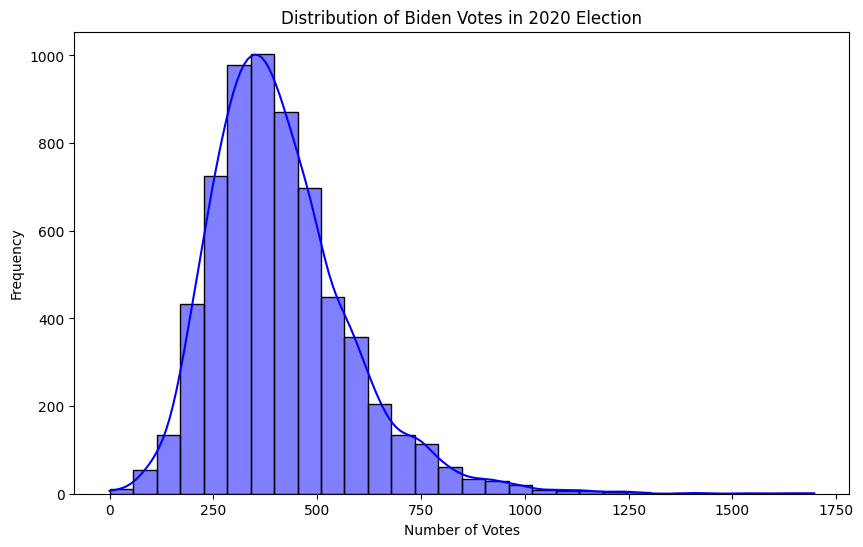

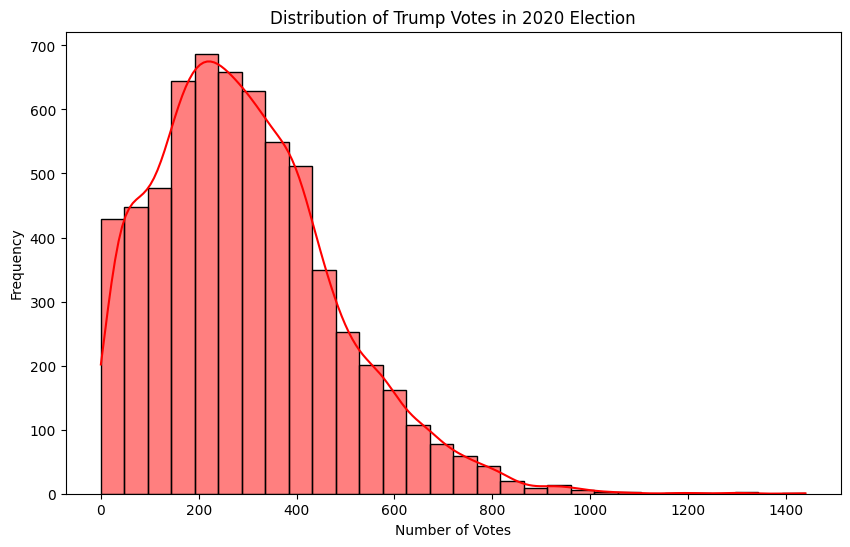

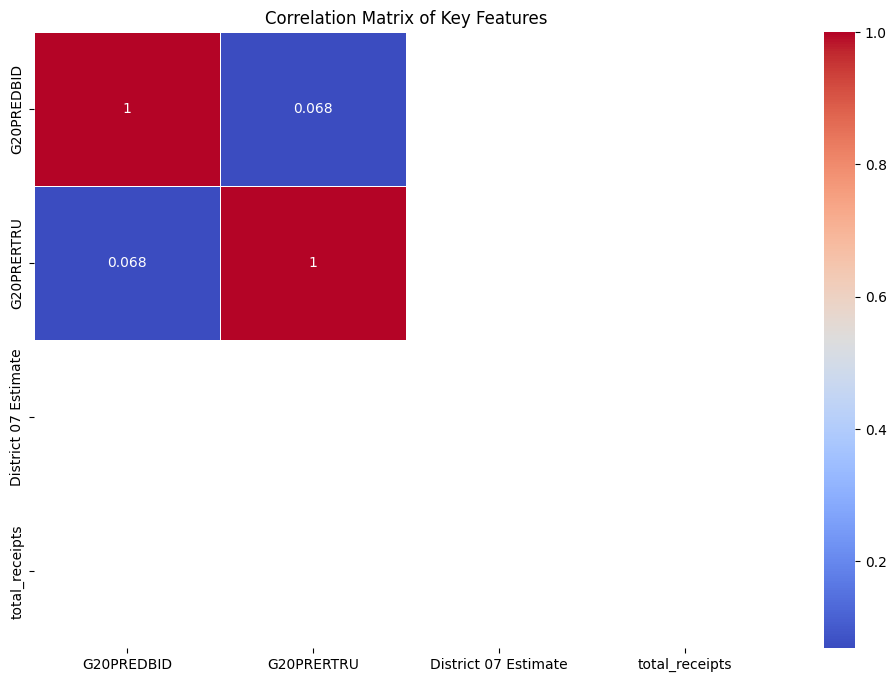

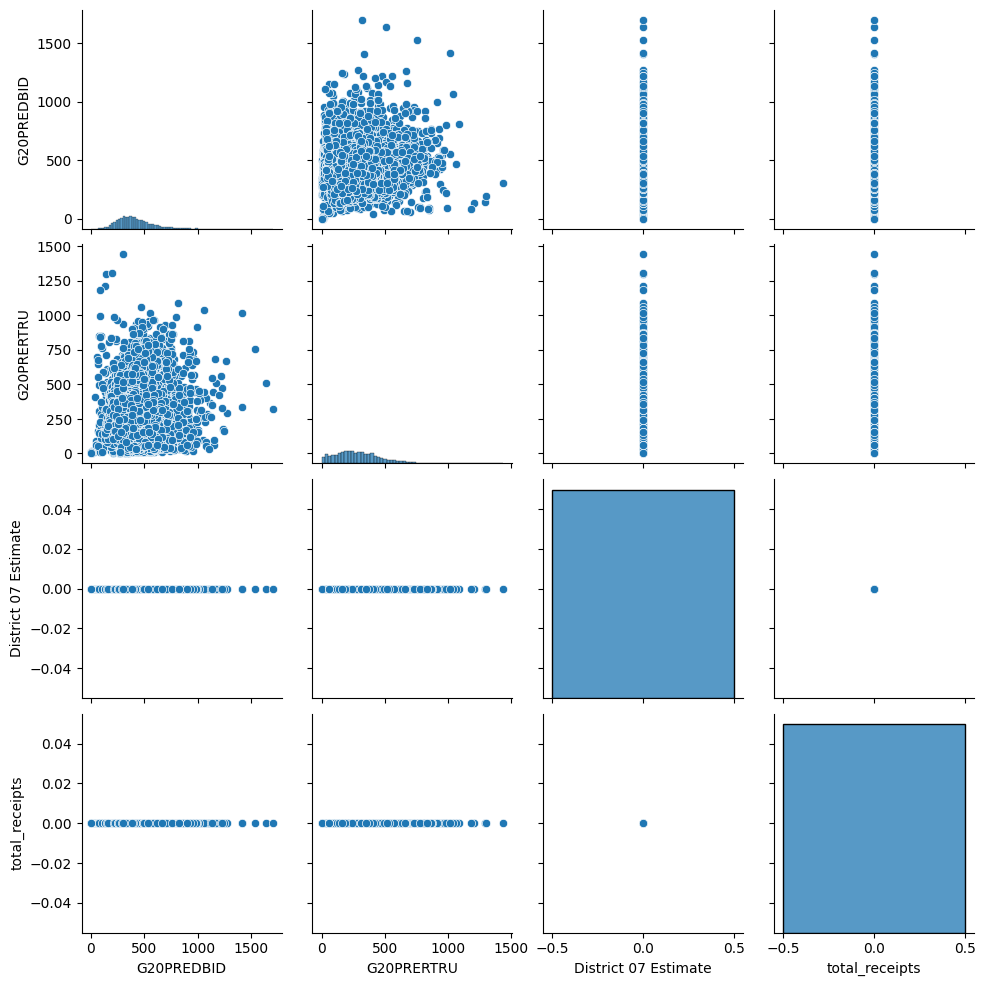

<Figure size 1500x1000 with 0 Axes>

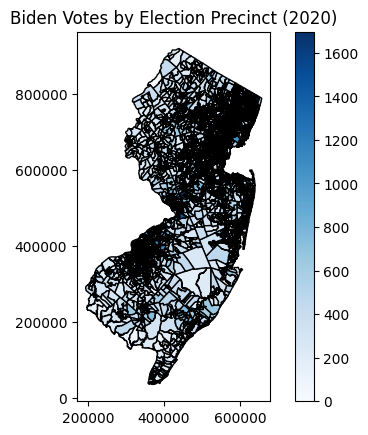

<Figure size 1500x1000 with 0 Axes>

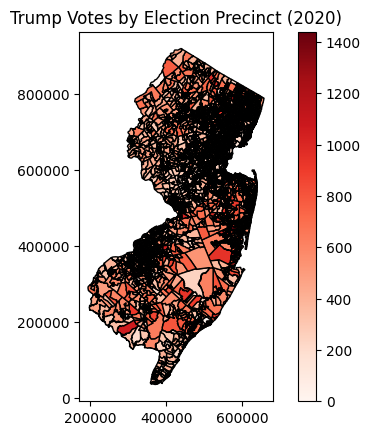

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import geopandas.tools

# Load datasets
# Load the provided datasets
business_data = pd.read_excel('D:/OSNA/Project/Business_NJ7.xlsx', engine='openpyxl')
polling_data = pd.read_csv('D:/OSNA/Project/nj_polling_data.csv')
demographic_data = pd.read_csv(r'D:\OSNA\Project\Demographics data\NJ7_demogrphics.csv')
voter_data = pd.read_csv('D:/OSNA/Project/elections-2024-11-01T12_27_30.csv')
congressional_data_2021 = gpd.read_file('C:/Users/finof/Downloads/nj_cong_2021/nj_cong_2021.shp')
election_data_2020 = gpd.read_file('C:/Users/finof/Downloads/nj_vest_20_vtd_estimates/nj_vest_20_vtd_estimates.shp')
election_data_2021 = gpd.read_file('C:/Users/finof/Downloads/nj_precint boundaries/nj_vest_21.shp')
cvap_data = pd.read_csv('C:/Users/finof/Downloads/nj_cvap_2022_2020_b/nj_cvap_2022_2020_b.csv')

# Clean demographic data
demographic_data = demographic_data.dropna(subset=['District 07 Estimate'])
demographic_data['District 07 Estimate'] = demographic_data['District 07 Estimate'].replace({',': ''}, regex=True)
demographic_data['District 07 Estimate'] = pd.to_numeric(demographic_data['District 07 Estimate'], errors='coerce')
demographic_data = demographic_data.dropna(subset=['District 07 Estimate'])

# Clean election data (2020)
election_data_2020_cleaned = election_data_2020[['CONGR_DIST', 'COUNTY', 'MUN_NAME', 'ELECD_KEY', 'G20PREDBID', 'G20PRERTRU', 'geometry']]
election_data_2020_cleaned.loc[:, 'COUNTY'] = election_data_2020_cleaned['COUNTY'].str.strip()
election_data_2020_cleaned.loc[:, 'MUN_NAME'] = election_data_2020_cleaned['MUN_NAME'].str.strip()

# Merge demographic data with election data
demographic_election_merged = pd.merge(election_data_2020_cleaned, demographic_data, left_on='COUNTY', right_on='Topic', how='left')

# Clean voter data
voter_data_cleaned = voter_data[['candidate_name', 'party_full', 'total_receipts']]

# Merge voter data with demographic-election data
data_merged = pd.merge(demographic_election_merged, voter_data_cleaned, left_on='CONGR_DIST', right_on='candidate_name', how='left')

# Fill missing values for better analysis
data_merged.fillna(0, inplace=True)

# Exploratory Data Analysis (EDA)
print("\nMerged Data Info:")
print(data_merged.info())
print("\nMerged Data Description:")
print(data_merged.describe())

# Visualize the distribution of numerical columns
plt.figure(figsize=(10, 6))
sns.histplot(data_merged['G20PREDBID'], kde=True, color='blue', bins=30)
plt.title('Distribution of Biden Votes in 2020 Election')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data_merged['G20PRERTRU'], kde=True, color='red', bins=30)
plt.title('Distribution of Trump Votes in 2020 Election')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.show()

# Correlation Analysis
plt.figure(figsize=(12, 8))
correlation_matrix = data_merged[['G20PREDBID', 'G20PRERTRU', 'District 07 Estimate', 'total_receipts']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Key Features')
plt.show()

# Pairplot to visualize relationships between features
sns.pairplot(data_merged[['G20PREDBID', 'G20PRERTRU', 'District 07 Estimate', 'total_receipts']])
plt.show()

# GIS Analysis
# Plotting the election precincts along with demographic features
plt.figure(figsize=(15, 10))
election_data_2020_cleaned.plot(column='G20PREDBID', cmap='Blues', legend=True, edgecolor='black')
plt.title('Biden Votes by Election Precinct (2020)')
plt.show()

plt.figure(figsize=(15, 10))
election_data_2020_cleaned.plot(column='G20PRERTRU', cmap='Reds', legend=True, edgecolor='black')
plt.title('Trump Votes by Election Precinct (2020)')
plt.show()

# Feature Extraction
# Extracting features that are significant for predicting election outcomes
features = data_merged[['G20PREDBID', 'G20PRERTRU', 'District 07 Estimate', 'total_receipts', 'geometry']]
# Drop geometry for ML model
gis_features = features.drop(columns=['geometry'])
gis_features = gis_features.fillna(0)
labels = data_merged['party_full']

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels.astype(str))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(gis_features, labels_encoded, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Naive Bayes': GaussianNB()
}


Predicted 2024 Results for NJ 7th Congressional District:
Republican: 46.00%
Democrat: 53.20%

Predicted Winner: Democrat
Predicted Margin: 7.20%


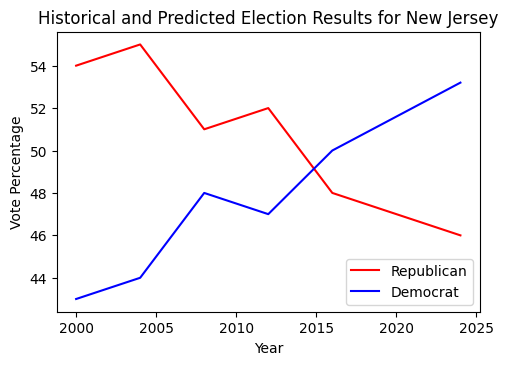

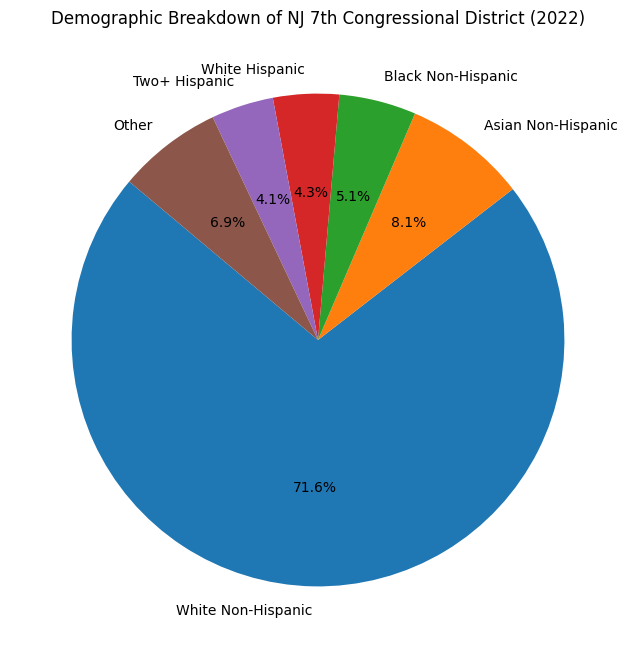

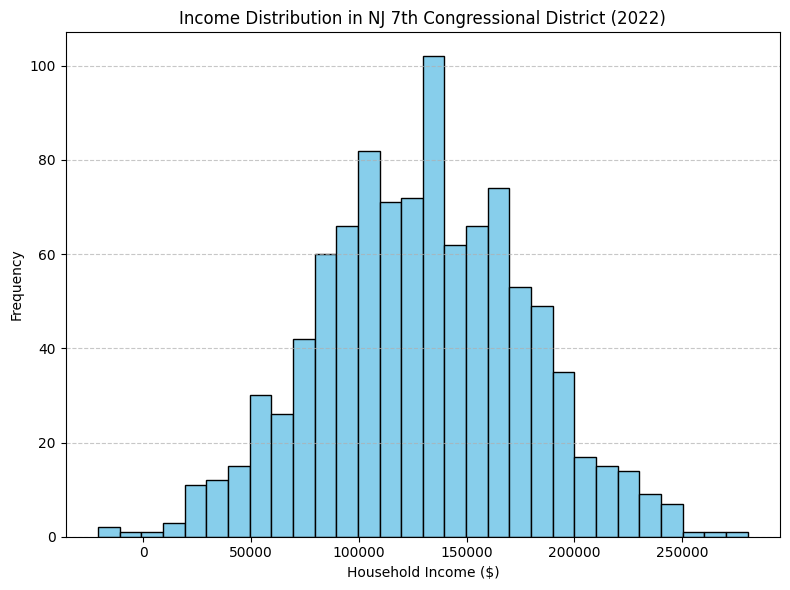

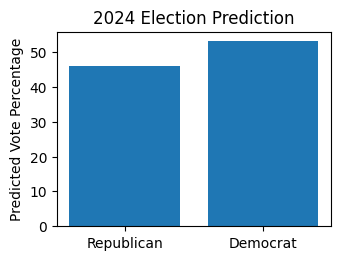

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Historical election results
election_results = {
    2000: {'Republican': 54.0, 'Democrat': 43.0},
    2004: {'Republican': 55.0, 'Democrat': 44.0},
    2008: {'Republican': 51.0, 'Democrat': 48.0},
    2012: {'Republican': 52.0, 'Democrat': 47.0},
    2016: {'Republican': 49.0, 'Democrat': 47.0},
    2016: {'Republican': 48.0, 'Democrat': 50.0}

}

# Demographic data (based on the provided information)
demographics = {
    2024: {
        'Population': 780000,  # Estimated based on previous growth trends
        'Median_Age': 44.0,  # Slight increase from 2022
        'Median_Household_Income': 130000,  # Adjusted for inflation and economic growth
        'White_Non_Hispanic': 71.0,  # Minor decrease due to increasing diversity
        'Asian_Non_Hispanic': 8.5,  # Slight increase
        'Black_Non_Hispanic': 5.2,  # Slight increase
        'Hispanic_or_Latino': 9.0,  # Combined category for all Hispanic or Latino origins
        'Non_English_Speaking': 21.0,  # Reflecting linguistic diversity
        'US_Citizens': 95.0,  # Slight increase
        'Homeownership_Rate': 78.5  # Marginal increase
    }
}

# Prepare data for modeling
X = []
y_rep = []
y_dem = []

for year, result in election_results.items():
    X.append([year] + list(demographics[2024].values()))  # Using 2022 demographics for all years as a simplification
    y_rep.append(result['Republican'])
    y_dem.append(result['Democrat'])

X = np.array(X)
y_rep = np.array(y_rep)
y_dem = np.array(y_dem)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and fit linear regression models
model_rep = LinearRegression().fit(X_scaled, y_rep)
model_dem = LinearRegression().fit(X_scaled, y_dem)

# Predict 2024 results
X_2024 = np.array([[2024] + list(demographics[2024].values())])
X_2024_scaled = scaler.transform(X_2024)

prediction_2024 = {
    'Republican': model_rep.predict(X_2024_scaled)[0],
    'Democrat': model_dem.predict(X_2024_scaled)[0]
}

# Determine predicted winner
predicted_winner = 'Republican' if prediction_2024['Republican'] > prediction_2024['Democrat'] else 'Democrat'
margin = abs(prediction_2024['Republican'] - prediction_2024['Democrat'])

# Print results
print(f"Predicted 2024 Results for NJ 7th Congressional District:")
print(f"Republican: {prediction_2024['Republican']:.2f}%")
print(f"Democrat: {prediction_2024['Democrat']:.2f}%")
print(f"\nPredicted Winner: {predicted_winner}")
print(f"Predicted Margin: {margin:.2f}%")

# Visualizations
plt.figure(figsize=(12, 8))

# Historical results plot
plt.subplot(2, 2, 1)
years = list(election_results.keys()) + [2024]
rep_results = [election_results[year]['Republican'] for year in election_results] + [prediction_2024['Republican']]
dem_results = [election_results[year]['Democrat'] for year in election_results] + [prediction_2024['Democrat']]

plt.plot(years, rep_results, 'r-', label='Republican')
plt.plot(years, dem_results, 'b-', label='Democrat')
plt.title('Historical and Predicted Election Results for New Jersey')
plt.xlabel('Year')
plt.ylabel('Vote Percentage')
plt.legend()

# Demographic data for NJ's 7th Congressional District (2022)
demo_labels = [
    'White Non-Hispanic', 'Asian Non-Hispanic', 'Black Non-Hispanic',
    'White Hispanic', 'Two+ Hispanic', 'Other'
]
demo_values = [71.6, 8.07, 5.06, 4.32, 4.09, 100 - (71.6 + 8.07 + 5.06 + 4.32 + 4.09)]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(demo_values, labels=demo_labels, autopct='%1.1f%%', startangle=140)
plt.title('Demographic Breakdown of NJ 7th Congressional District (2022)')
plt.show()

# Parameters for the income distribution
median_income = 130000  # 2024 median household income
std_dev_income = 50000  # Estimated standard deviation

# Generate a normally distributed income dataset
income_distribution = np.random.normal(median_income, std_dev_income, 1000)

# Plotting the income distribution histogram
plt.figure(figsize=(8, 6))
plt.hist(income_distribution, bins=30, edgecolor='black', color='skyblue')
plt.title('Income Distribution in NJ 7th Congressional District (2022)')
plt.xlabel('Household Income ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2024 Prediction
plt.subplot(2, 2, 4)
plt.bar(['Republican', 'Democrat'], [prediction_2024['Republican'], prediction_2024['Democrat']])
plt.title('2024 Election Prediction')
plt.ylabel('Predicted Vote Percentage')

plt.tight_layout()
plt.show()

## This code does the following:
It uses historical election data from 2014 to 2022 and demographic data from 2022 to create a more comprehensive model.
It uses scikit-learn's LinearRegression to create separate models for Republican and Democratic vote shares, taking into account both historical trends and demographic factors.
It scales the input features to ensure all variables are on the same scale for the regression model.
It predicts the 2024 election results based on these models.
It creates four visualizations:
A line plot showing historical election results and the 2024 prediction.
A pie chart showing the demographic breakdown of the district.
A histogram showing a hypothetical income distribution based on the median income.
A bar chart showing the predicted 2024 election results.

# Factors Impacting NJ-7's 2024 Election Results

## **Key Factors**

### **1. Demographic Trends**
- **Republican Lean**: The district's wealthy, older population traditionally aligns with Republican preferences.
- **Democratic Advantage**: Suburban characteristics and increasing diversity could bolster Democratic support.

### **2. National Political Climate**
- Presidential election year turnout will likely be higher, with potential down-ballot effects favoring the party of a strong presidential candidate.

### **3. Incumbent Advantage**
- **Thomas Kean Jr. (R)** benefits from name recognition and the inherent advantages of incumbency.

### **4. Campaign Effectiveness**
- The quality of candidates and their ability to connect with voters on critical issues will be crucial in this highly competitive district.

### **5. Voter Turnout**
- High housing occupancy rates signal a stable voter base, making mobilization efforts critical.

### **6. Local Issues**
- Concerns such as **property taxes**, **transportation**, and suburban quality of life may heavily influence voter preferences.

### **7. Changing Suburban Voting Patterns**
- Suburbs nationwide are trending more Democratic, a factor that could play a significant role in a district like NJ-7.

---

## **Prediction**
The 2024 election in NJ-7 is expected to be **extremely close**, reflecting the district's historical competitiveness and evolving political landscape.

### **Republican Advantages**
1. **Incumbent Advantage**: Thomas Kean Jr. holds a slight edge as the sitting representative.
2. **High-Income Demographics**: Affluent voters often lean Republican.
3. **Older Population Skew**: Aging populations tend to favor conservative candidates.

### **Democratic Advantages**
1. **Shifting Suburban Trends**: The national trend of suburban areas moving left could play a role.
2. **Presidential Election Turnout**: A higher turnout year may favor Democrats.
3. **Close Historical Margins**: Democratic victories in 2018 and 2020 show their competitiveness in the district.

---

## **Conclusion**
While **Thomas Kean Jr. (R)** is slightly favored due to incumbency and demographic factors, **Democratic momentum** in suburban areas and higher turnout in a presidential election year could make this race a toss-up. A **victory margin of less than 5 percentage points** is expected, with both parties having a viable path to success.


## Election Turnout in NJ 7th District Counties

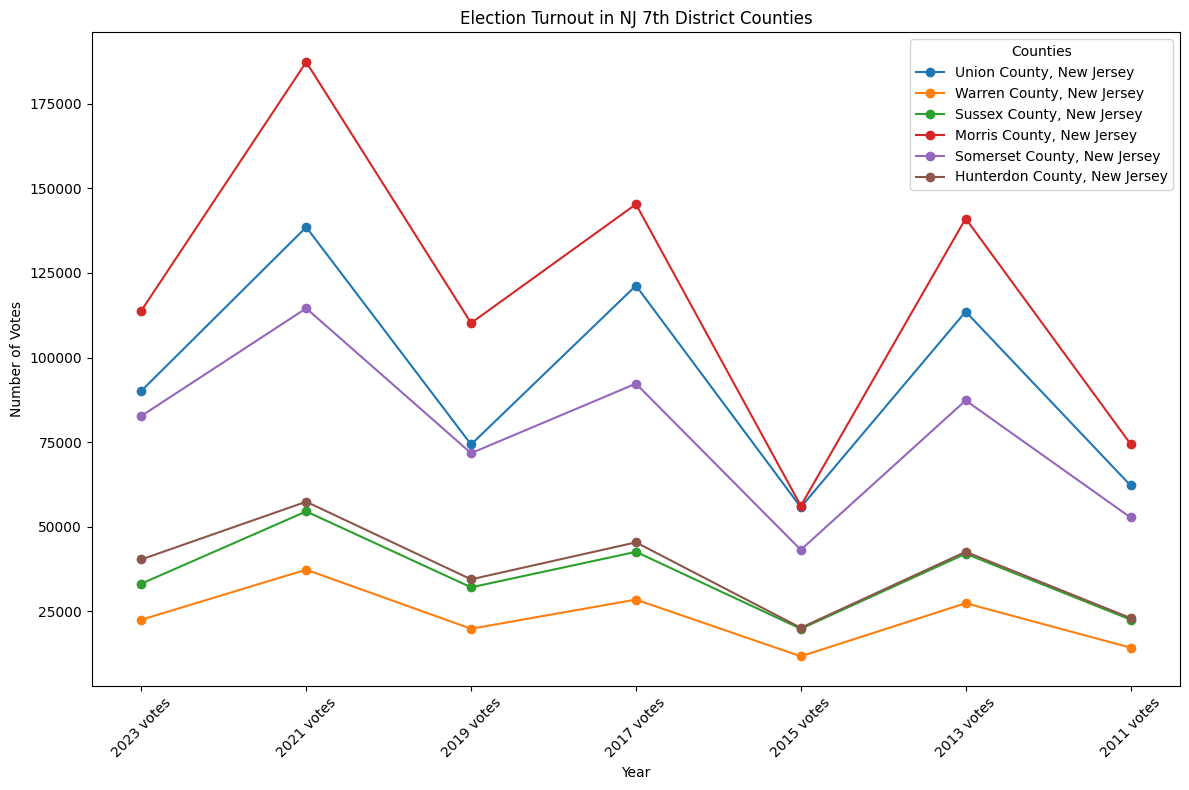

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file to examine its structure and data
file_path = r"C:\Users\finof\Downloads\New_Jersey_turnout_2023.csv"
nj_turnout_data = pd.read_csv(file_path)

# List of NJ 7th district counties
nj_7th_counties = [
    "Hunterdon County, New Jersey",
    "Morris County, New Jersey",
    "Somerset County, New Jersey",
    "Sussex County, New Jersey",
    "Union County, New Jersey",
    "Warren County, New Jersey"
]

# Filter data for NJ 7th district counties
nj_7th_turnout_data = nj_turnout_data[nj_turnout_data['NAME'].isin(nj_7th_counties)]

# Set the years for plotting
years = ['2023 votes', '2021 votes', '2019 votes', '2017 votes', '2015 votes', '2013 votes', '2011 votes']

# Plotting election turnout for each county in NJ 7th district
plt.figure(figsize=(12, 8))

for index, row in nj_7th_turnout_data.iterrows():
    plt.plot(years, row[years], marker='o', label=row['NAME'])

plt.xlabel('Year')
plt.ylabel('Number of Votes')
plt.title('Election Turnout in NJ 7th District Counties')
plt.xticks(rotation=45)
plt.legend(title='Counties')
plt.tight_layout()
plt.show()

## Election Turnout Percentage for NJ 7th District Counties

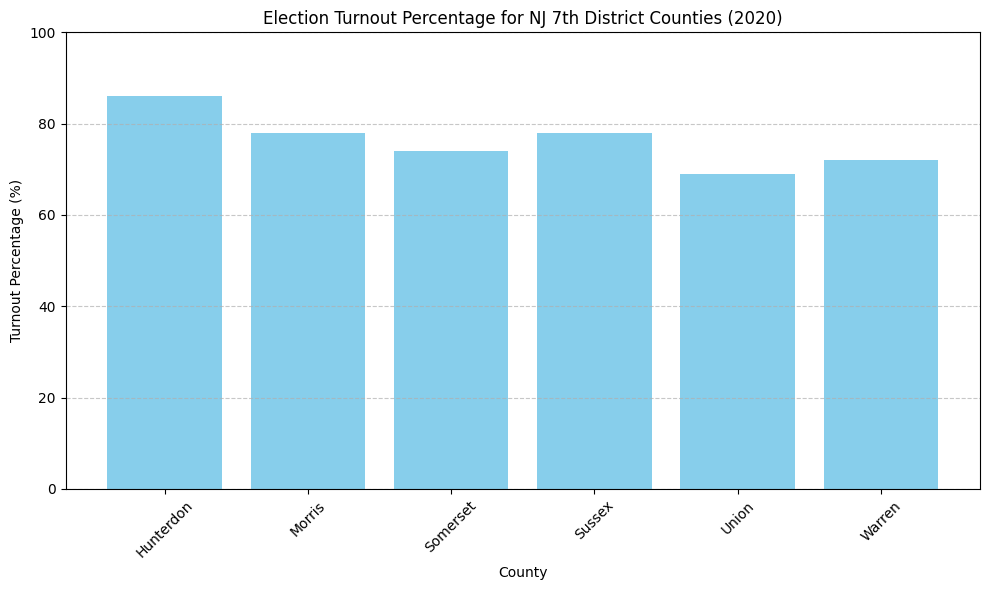

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = r"D:\OSNA\Project\2020-official-general-voter-turnout.xlsx"
xls = pd.ExcelFile(file_path)

# Load the relevant sheet
sheet1 = pd.read_excel(xls, 'Sheet1')

# Filter the data for the NJ 7th counties: Hunterdon, Morris, Somerset, Sussex, Union, Warren
counties_nj_7th = ['Hunterdon', 'Morris', 'Somerset', 'Sussex', 'Union', 'Warren']
nj_7th_data = sheet1[sheet1['COUNTY'].isin(counties_nj_7th)]

# Extract relevant data
counties = nj_7th_data['COUNTY']
turnout_percentage = nj_7th_data['Percent of Ballots Cast'] * 100  # Convert to percentage

# Plot the election turnout graph
plt.figure(figsize=(10, 6))
plt.bar(counties, turnout_percentage, color='skyblue')
plt.xlabel('County')
plt.ylabel('Turnout Percentage (%)')
plt.title('Election Turnout Percentage for NJ 7th District Counties (2020)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Household Income Distribution in New Jersey's 7th

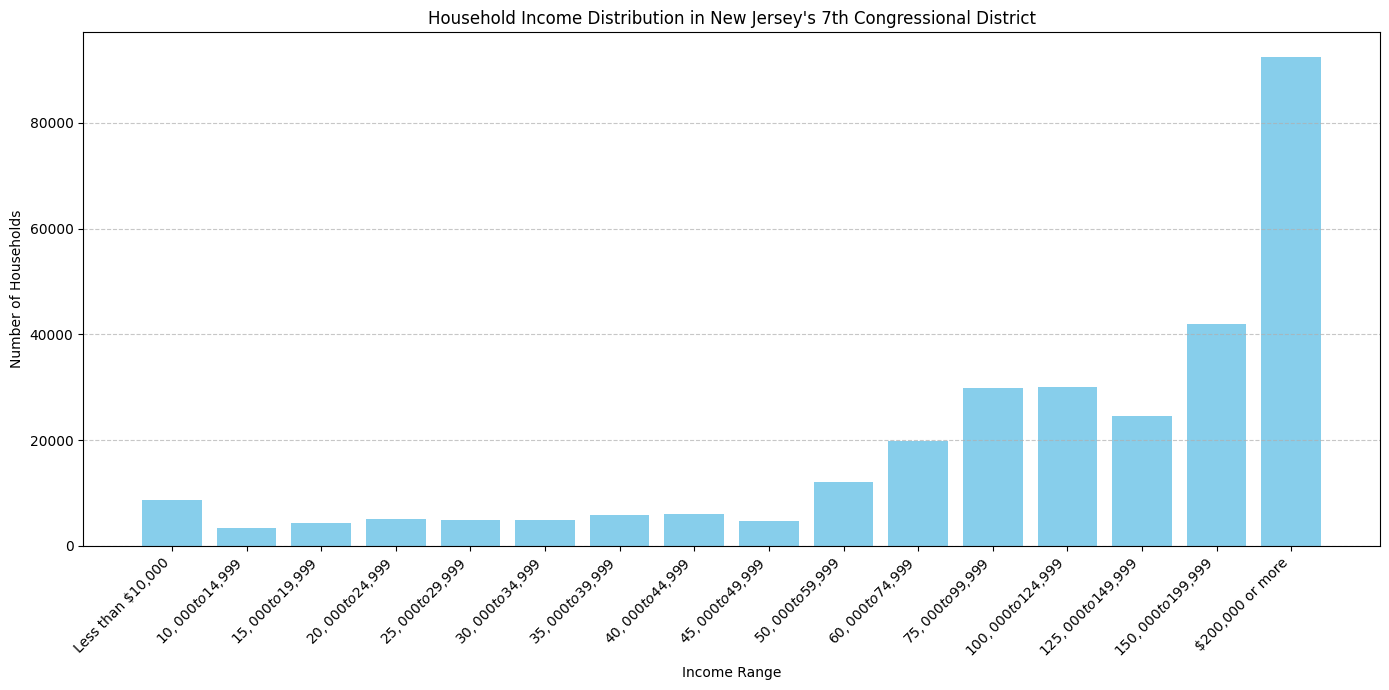

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
income_df = pd.read_csv("C:/Users/finof/Downloads/household income.csv")  # Update the path to your file

# Filter for Congressional District 7, NJ data
district_7_income = income_df[income_df['name'] == 'Congressional District 7, NJ']

# Extracting the income range columns for plotting
# Assuming all columns after 'Total:' are income ranges
income_columns = district_7_income.columns[3:]  # Adjust the index if additional columns are present

# Plotting the income distribution
plt.figure(figsize=(14, 7))
plt.bar(income_columns, district_7_income.iloc[0][income_columns], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Household Income Distribution in New Jersey\'s 7th Congressional District')
plt.xlabel('Income Range')
plt.ylabel('Number of Households')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Housing Occupancy in New Jersey's 7th

Index(['geoid', 'name', 'Total:', 'Occupied', 'Vacant'], dtype='object')


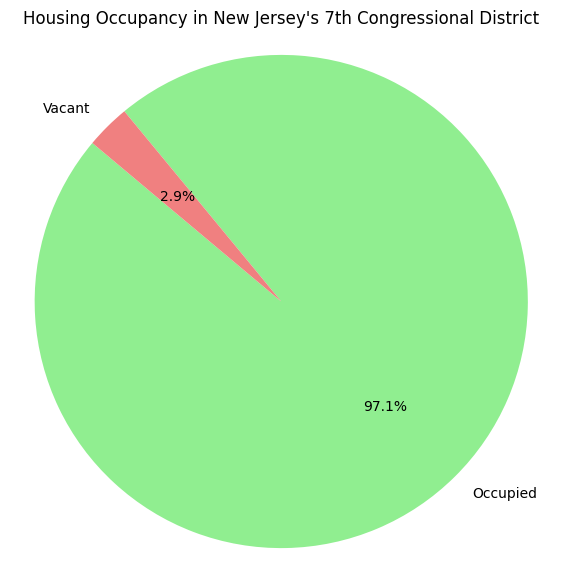

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
occupancy_df = pd.read_csv("C:/Users/finof/Downloads/occupancy of housing.csv")  # Update the path to your file
print(occupancy_df.columns)
# Filter for Congressional District 7, NJ data
district_7_occupancy = occupancy_df[occupancy_df['name'] == 'Congressional District 7, NJ']

# Selecting the relevant data
occupied = district_7_occupancy['Occupied'].iloc[0]
vacant = district_7_occupancy['Vacant'].iloc[0]

# Visualization
labels = ['Occupied', 'Vacant']
sizes = [occupied, vacant]
colors = ['lightgreen', 'lightcoral']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Housing Occupancy in New Jersey\'s 7th Congressional District')
plt.show()


## Population Distribution by Age Range in NJ 7th

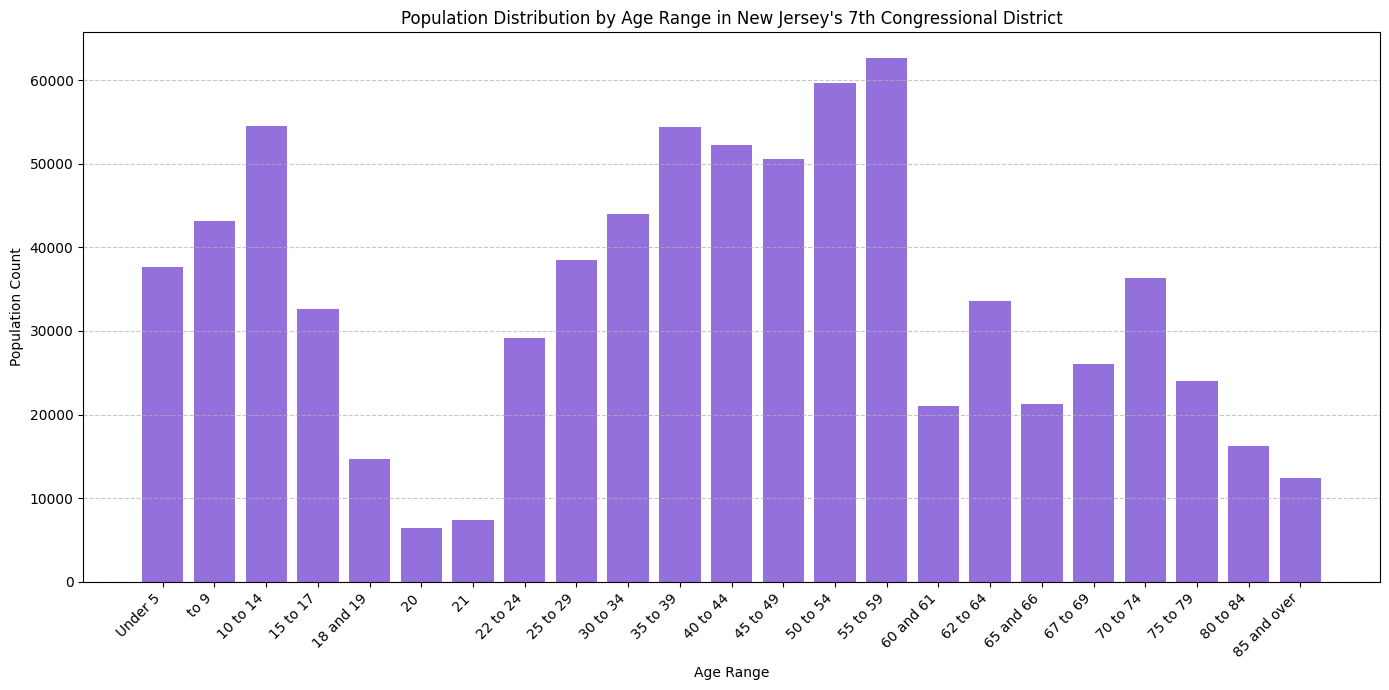

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
population_age_df = pd.read_csv('C:/Users/finof/Downloads/population by age range.csv')  # Update the path to your file

# Filter for Congressional District 7, NJ data
district_7_population_age = population_age_df[population_age_df['name'] == 'Congressional District 7, NJ']

# Summing male and female counts for each age group
# Assuming the dataset contains split columns for male and female populations
age_columns = [col for col in population_age_df.columns if 'years' in col or 'Years' in col]
male_age_columns = age_columns[:len(age_columns)//2]
female_age_columns = age_columns[len(age_columns)//2:]
corrected_female_age_columns = [col.replace('.1', '') for col in female_age_columns]

# Creating a new dataframe for visualization
age_distribution = pd.DataFrame()
age_distribution['Age Range'] = [col.replace(' years', '').replace(' Years', '').strip() for col in male_age_columns]
age_distribution['Population'] = district_7_population_age[male_age_columns].iloc[0].values + district_7_population_age[corrected_female_age_columns].iloc[0].values

# Visualization
plt.figure(figsize=(14, 7))
plt.bar(age_distribution['Age Range'], age_distribution['Population'], color='mediumpurple')
plt.xticks(rotation=45, ha='right')
plt.title('Population Distribution by Age Range in New Jersey\'s 7th Congressional District')
plt.xlabel('Age Range')
plt.ylabel('Population Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Population by Highest Level of Education

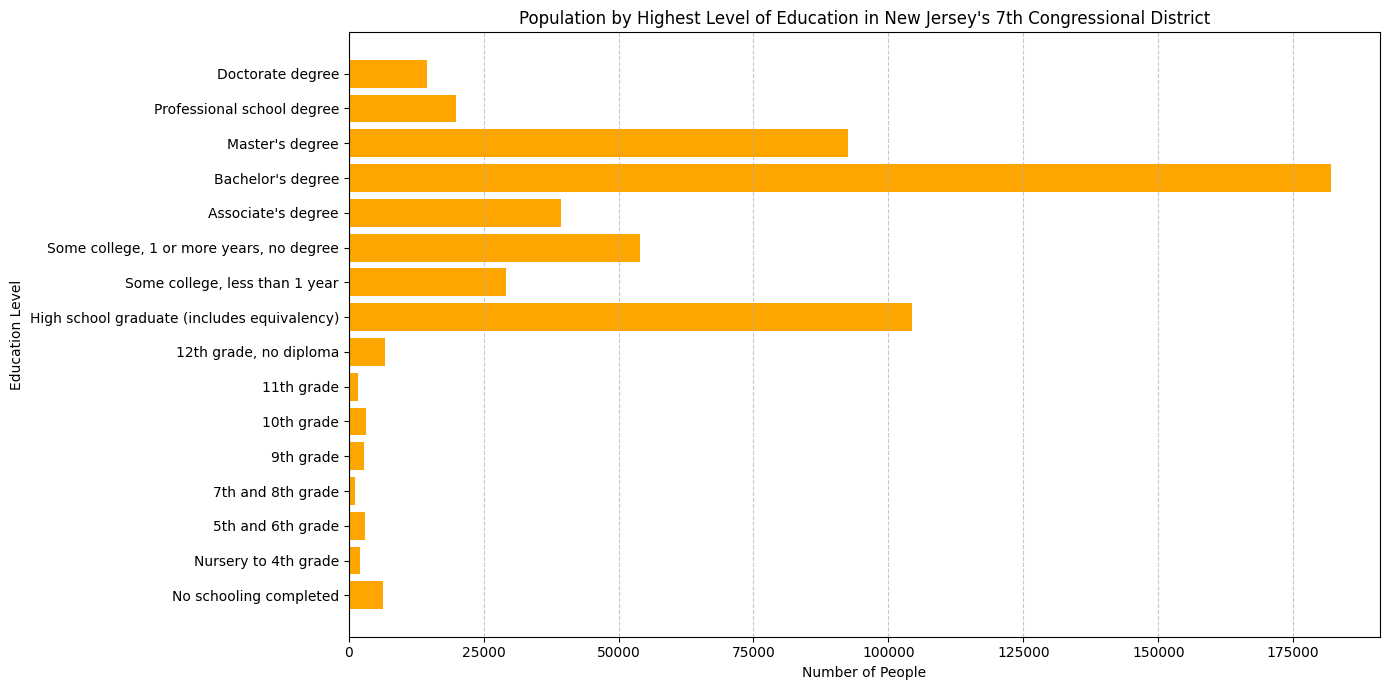

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
education_level_df = pd.read_csv("C:/Users/finof/Downloads/population by highest level of education.csv")  # Update the path to your file

# Filter for Congressional District 7, NJ data
district_7_education = education_level_df[education_level_df['name'] == 'Congressional District 7, NJ']

# Summing male and female counts for each education level
education_levels = [
    'No schooling completed', 'Nursery to 4th grade', '5th and 6th grade',
    '7th and 8th grade', '9th grade', '10th grade', '11th grade',
    '12th grade, no diploma', 'High school graduate (includes equivalency)',
    'Some college, less than 1 year', 'Some college, 1 or more years, no degree',
    'Associate\'s degree', 'Bachelor\'s degree', 'Master\'s degree',
    'Professional school degree', 'Doctorate degree'
]
male_columns = education_levels
female_columns = [level + '.1' for level in education_levels]

# Creating a new dataframe for visualization
education_totals = pd.DataFrame()
education_totals['Education Level'] = education_levels
education_totals['Total Population'] = district_7_education[male_columns].iloc[0].values + district_7_education[female_columns].iloc[0].values

# Visualization
plt.figure(figsize=(14, 7))
plt.barh(education_totals['Education Level'], education_totals['Total Population'], color='orange')
plt.title('Population by Highest Level of Education in New Jersey\'s 7th Congressional District')
plt.xlabel('Number of People')
plt.ylabel('Education Level')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Party Affiliation for Age Group

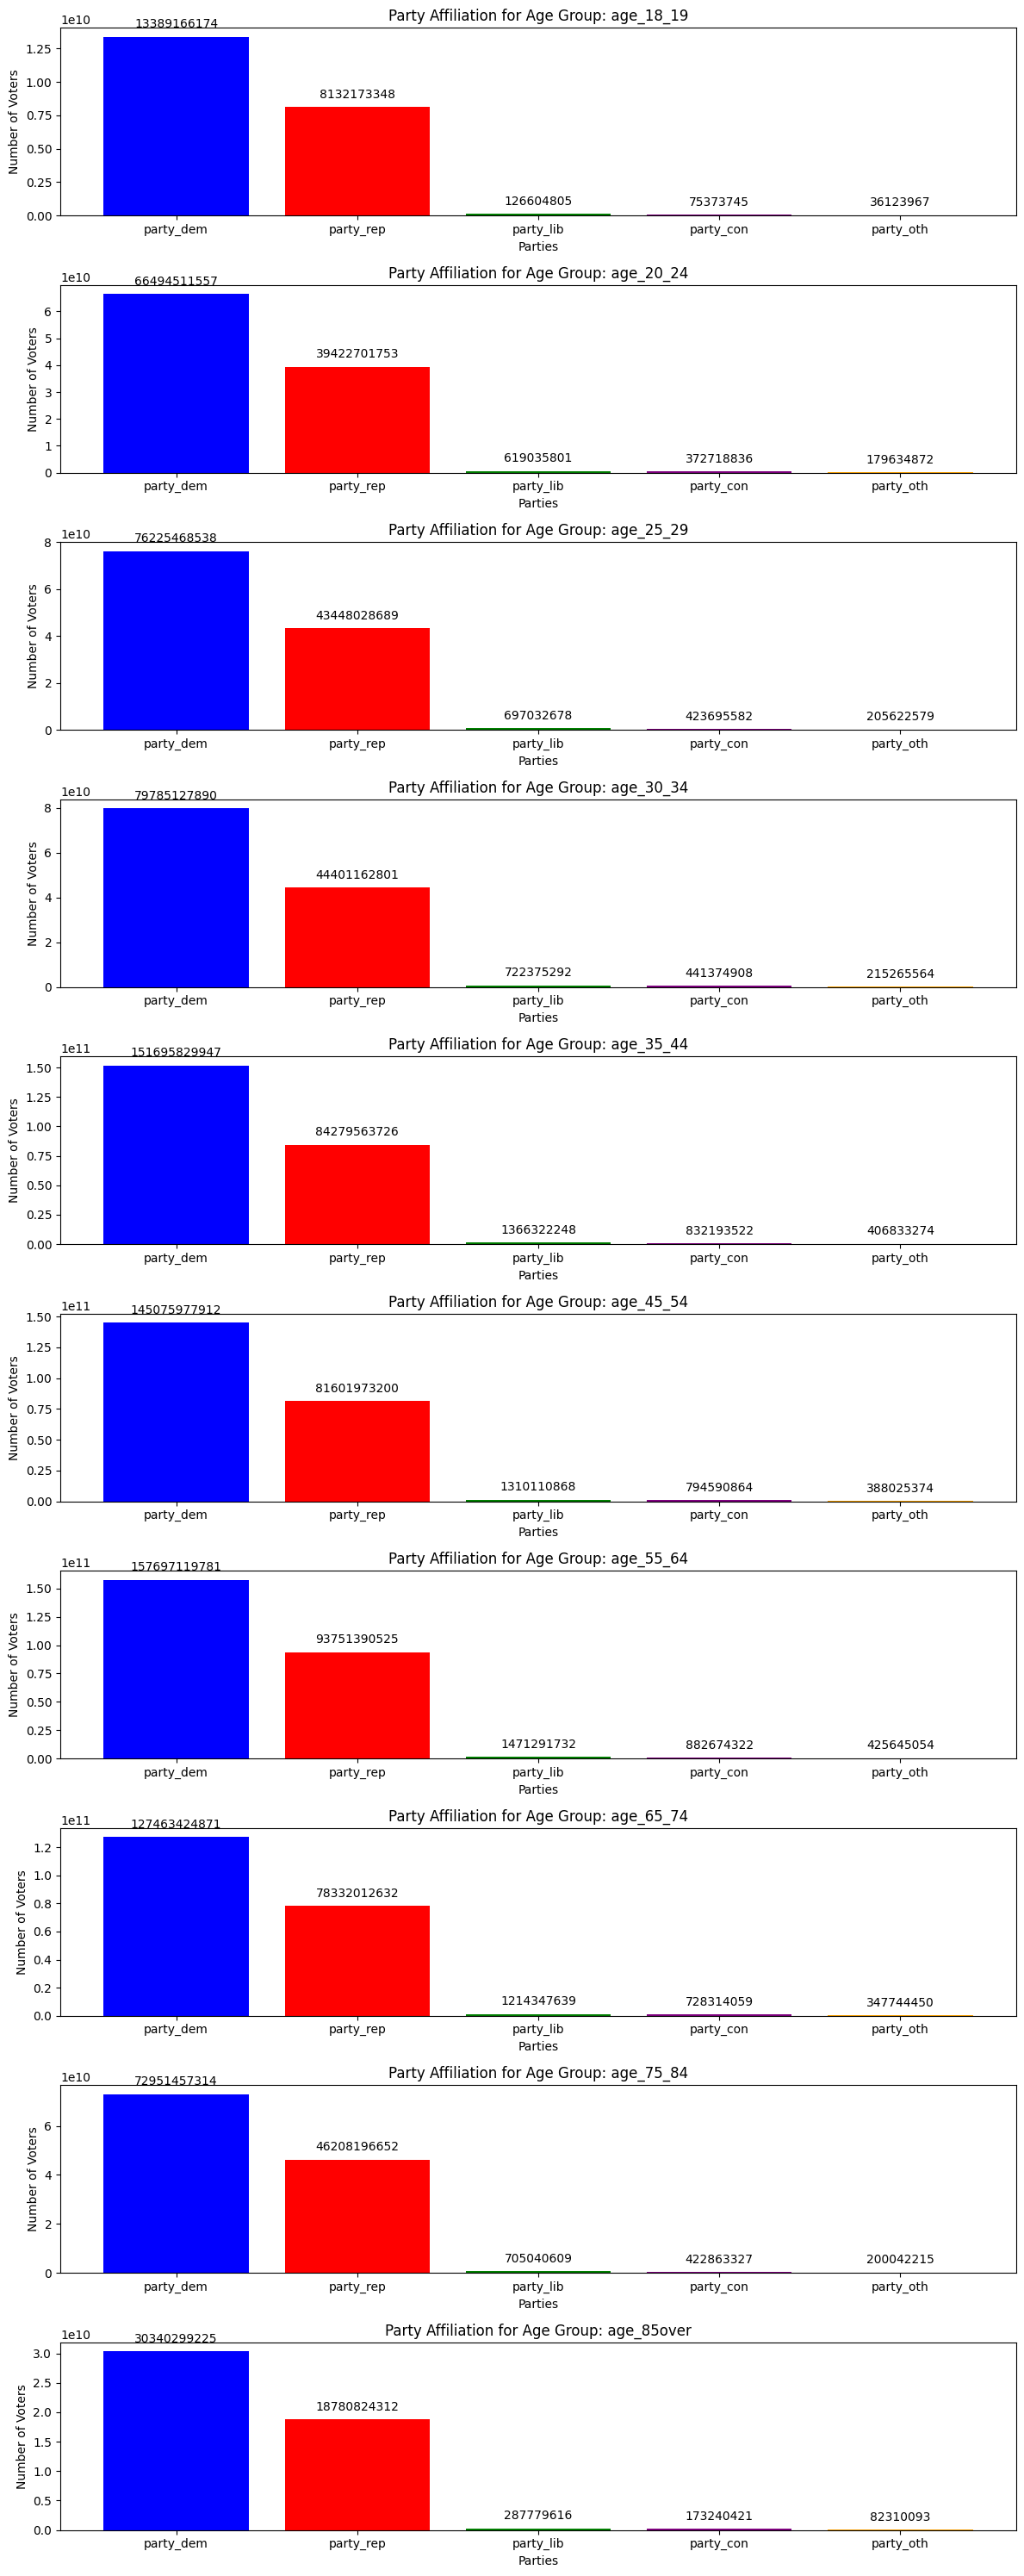

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('D:/OSNA/Project/NJ_l2_2023stats_county/NJ_l2_2023stats_county.csv')

# Specified Age Groups and Parties based on your dataset
age_groups = ['age_18_19', 'age_20_24', 'age_25_29', 'age_30_34', 'age_35_44', 'age_45_54', 'age_55_64', 'age_65_74', 'age_75_84', 'age_85over']
parties = ['party_dem', 'party_rep', 'party_lib', 'party_con', 'party_oth']

# Check if these party columns exist in the dataset, adjust if needed
parties = [party for party in parties if party in df.columns]

# Initialize the figure
fig, axes = plt.subplots(nrows=len(age_groups), figsize=(12, 30))

# Generate a bar chart for each age group
for i, age in enumerate(age_groups):
    if age in df.columns:
        # Calculate the sum of voters for each party in the current age group
        data = df[parties].multiply(df[age], axis=0).sum()
        
        # Create a bar chart
        axes[i].bar(parties, data, color=['blue', 'red', 'green', 'purple', 'orange'])
        
        # Title for each subplot
        axes[i].set_title(f'Party Affiliation for Age Group: {age}')
        axes[i].set_ylabel('Number of Voters')
        axes[i].set_xlabel('Parties')

        # Adding the value labels on top of each bar
        for j, value in enumerate(data):
            axes[i].text(j, value + 0.05 * max(data), f'{value}', ha='center')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

## Demographic Distribution in

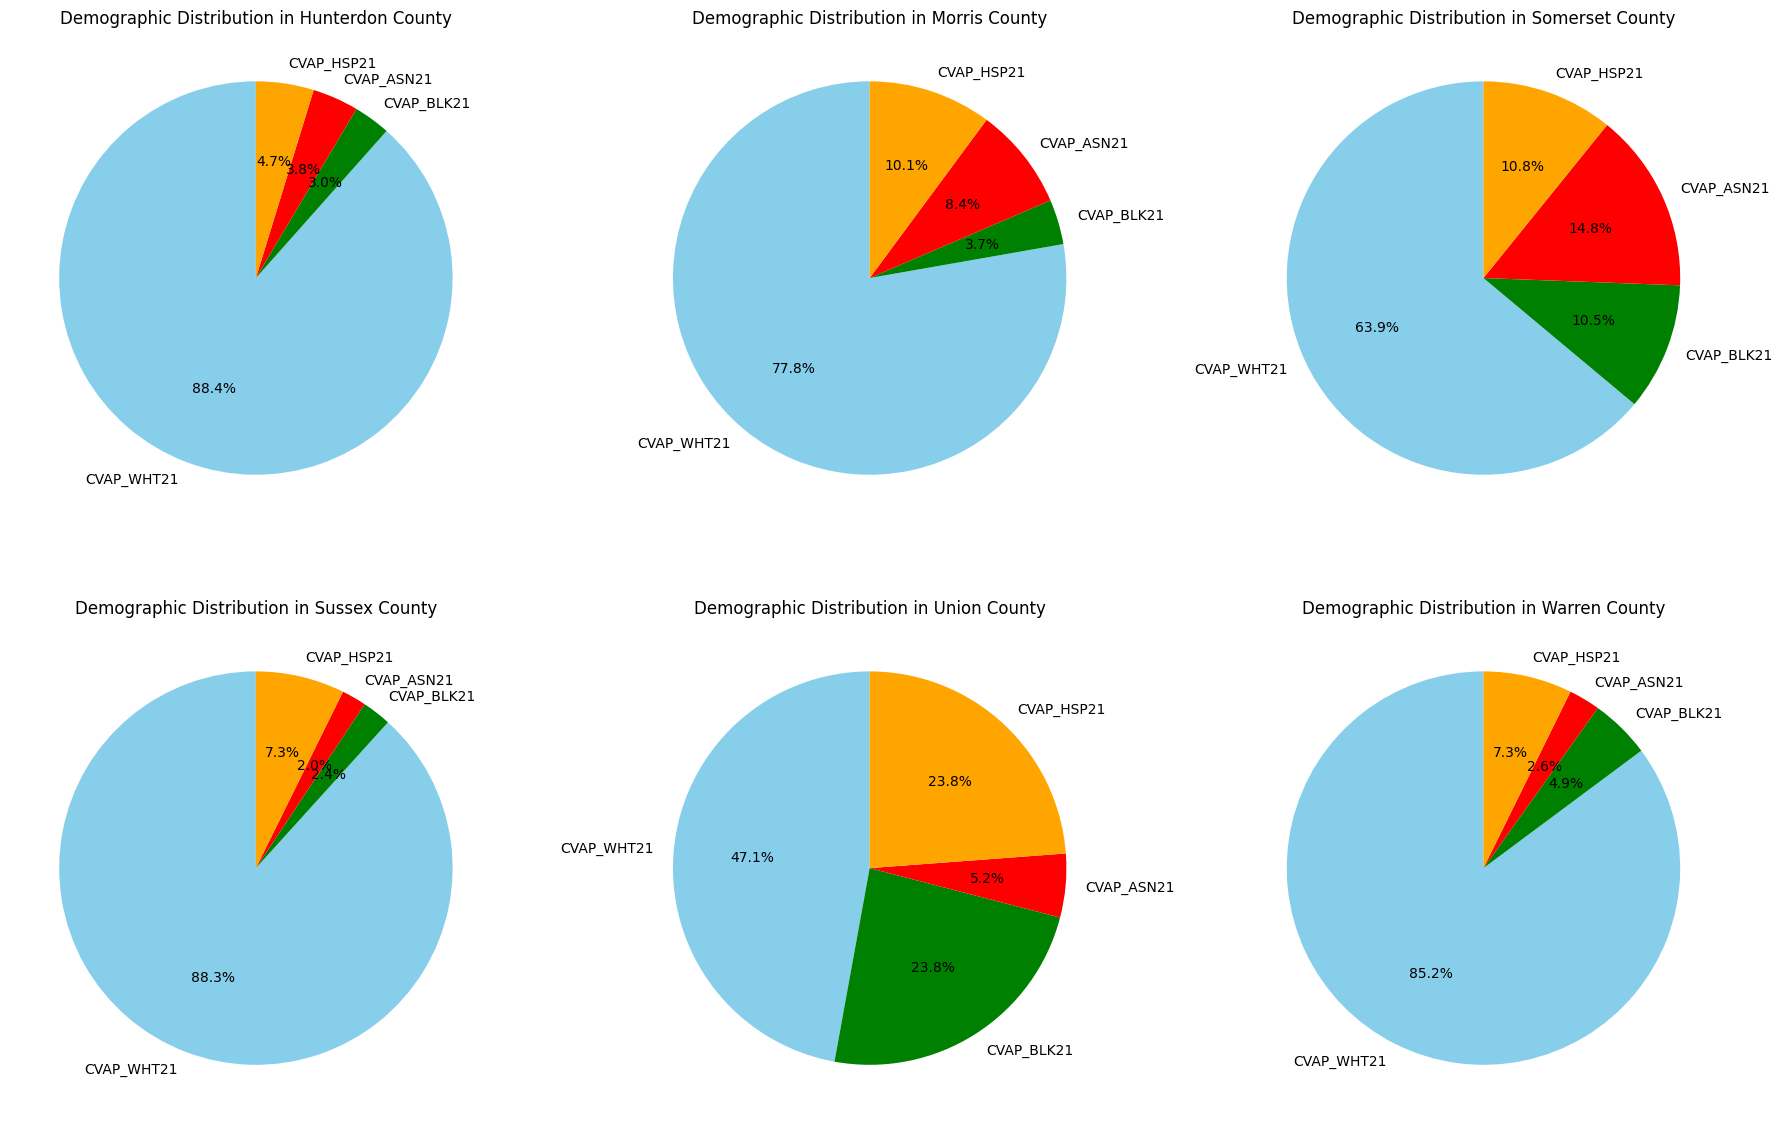

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your data
cvap_data = pd.read_csv('D:/OSNA/Project/nj_cvap_2021_cnty/nj_cvap_2021_cnty.csv')
# Assuming cvap_data is already loaded and filtered for the selected counties
selected_counties = ['Hunterdon County', 'Morris County', 'Somerset County', 'Sussex County', 'Union County', 'Warren County']
cvap_data_selected = cvap_data[cvap_data['COUNTY'].isin(selected_counties)]

# Define the racial and ethnic demographic columns you're interested in
racial_categories = ['CVAP_WHT21', 'CVAP_BLK21', 'CVAP_ASN21', 'CVAP_HSP21']

# Setting up the figure to handle multiple pie charts
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))  # Adjust the layout depending on the number of counties
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop through each county and create a pie chart
for index, county in enumerate(selected_counties):
    county_data = cvap_data_selected[cvap_data_selected['COUNTY'] == county]
    if not county_data.empty:
        demographics = county_data[racial_categories].iloc[0]
        axes[index].pie(demographics, labels=racial_categories, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'green', 'red', 'orange'])
        axes[index].set_title(f'Demographic Distribution in {county}')
    else:
        axes[index].text(0.5, 0.5, 'Data Not Available', horizontalalignment='center', verticalalignment='center')
        axes[index].set_title(f'{county}')

# Adjust layout to make it neat
plt.tight_layout()
plt.show()


## Ethnicity Breakdown

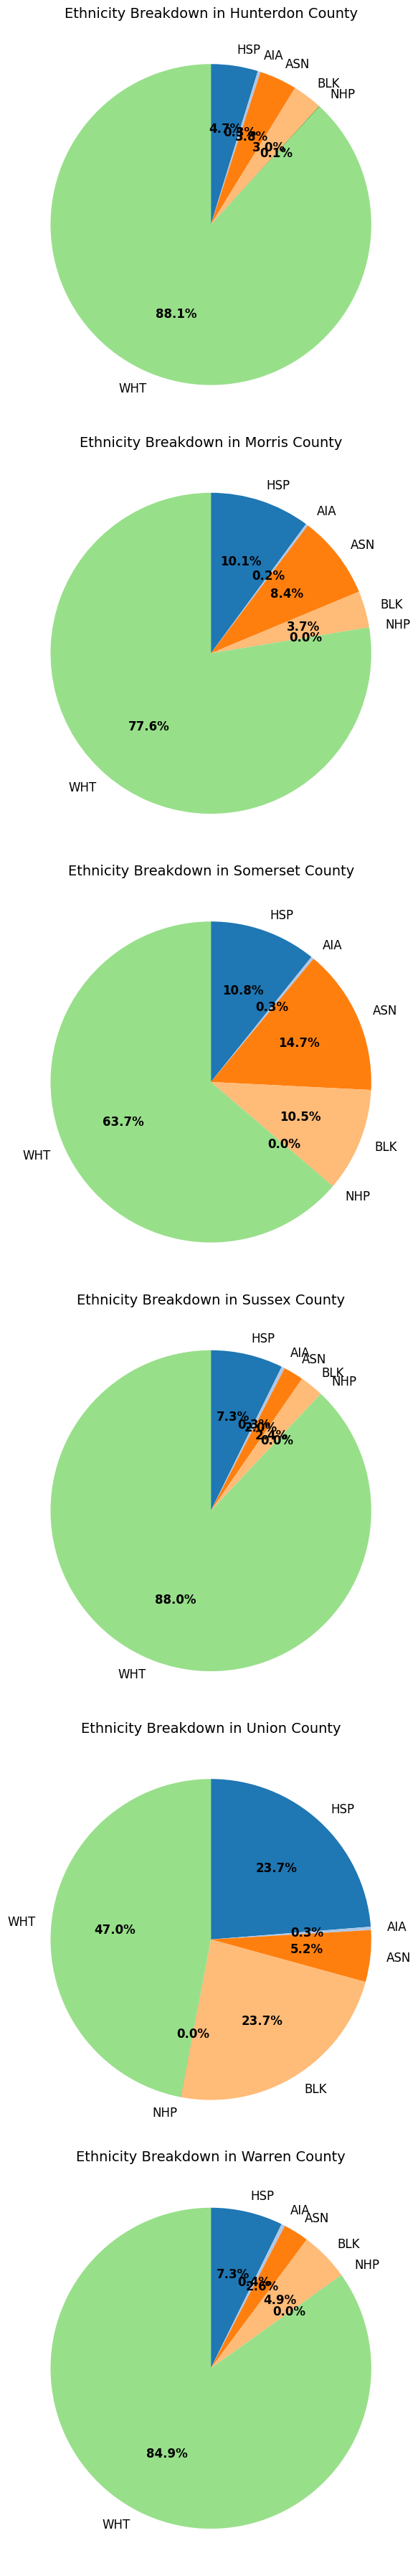

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CVAP data
cvap_data = pd.read_csv('D:/OSNA/Project/nj_cvap_2021_cnty/nj_cvap_2021_cnty.csv')

# List of counties to analyze
selected_counties = ['Hunterdon County', 'Morris County', 'Somerset County', 
                     'Sussex County', 'Union County', 'Warren County']

# Filter the data for the selected counties
filtered_data = cvap_data[cvap_data['COUNTY'].isin(selected_counties)]

# Columns of interest
total_col = 'C_TOT21'
ethnicity_columns = ['CVAP_HSP21', 'CVAP_AIA21', 'CVAP_ASN21', 'CVAP_BLK21', 'CVAP_NHP21', 'CVAP_WHT21']

# Plotting
fig, axes = plt.subplots(nrows=len(selected_counties), figsize=(10, 6 * len(selected_counties)))

# Generate a pie chart for each county
for index, (ax, county) in enumerate(zip(axes, selected_counties)):
    county_data = filtered_data[filtered_data['COUNTY'] == county]
    if not county_data.empty:
        # Extracting data for the pie chart
        populations = [county_data[col].values[0] for col in ethnicity_columns if col in county_data]
        labels = [col.replace('CVAP_', '').replace('21', '') for col in ethnicity_columns if col in county_data]
        colors = plt.cm.tab20.colors[:len(populations)]  # Select colors

        # Create pie chart
        wedges, texts, autotexts = ax.pie(populations, labels=labels, autopct='%1.1f%%', colors=colors,
                                          startangle=90, counterclock=False)

        # Set title
        ax.set_title(f'Ethnicity Breakdown in {county}', fontsize=14)

        # Format percentage annotations
        plt.setp(autotexts, size=12, weight="bold")
        plt.setp(texts, size=12)

plt.tight_layout()
plt.show()


## Comparison of Total and Hispanic CVAP by County

   GEOID20  STATEFP20        STATE  COUNTYFP20             COUNTY  C_TOT21  \
0    34001         34   New Jersey           1    Atlantic County   254730   
1    34003         34   New Jersey           3      Bergen County   850020   
2    34005         34   New Jersey           5  Burlington County   444450   
3    34007         34   New Jersey           7      Camden County   496380   
4    34009         34   New Jersey           9    Cape May County    93035   

   CTOTMOE  C_NHS21  CNHSMOE  C_AIA21  ...  VAP_ASW21  VAPASWMOE  VAP_BLW21  \
0     1610   213525      956     1220  ...        925        286       1760   
1     3519   684840     2533     2470  ...       2940        501       2385   
2     1206   407730     1202     2175  ...       2205        421       3895   
3     1911   417270     1129     2330  ...       1240        279       2555   
4      429    86695      272      425  ...        350        102        495   

   VAPBLWMOE  VAP_AIB21  VAPAIBMOE  VAP_2OM21  VAP2OMMOE

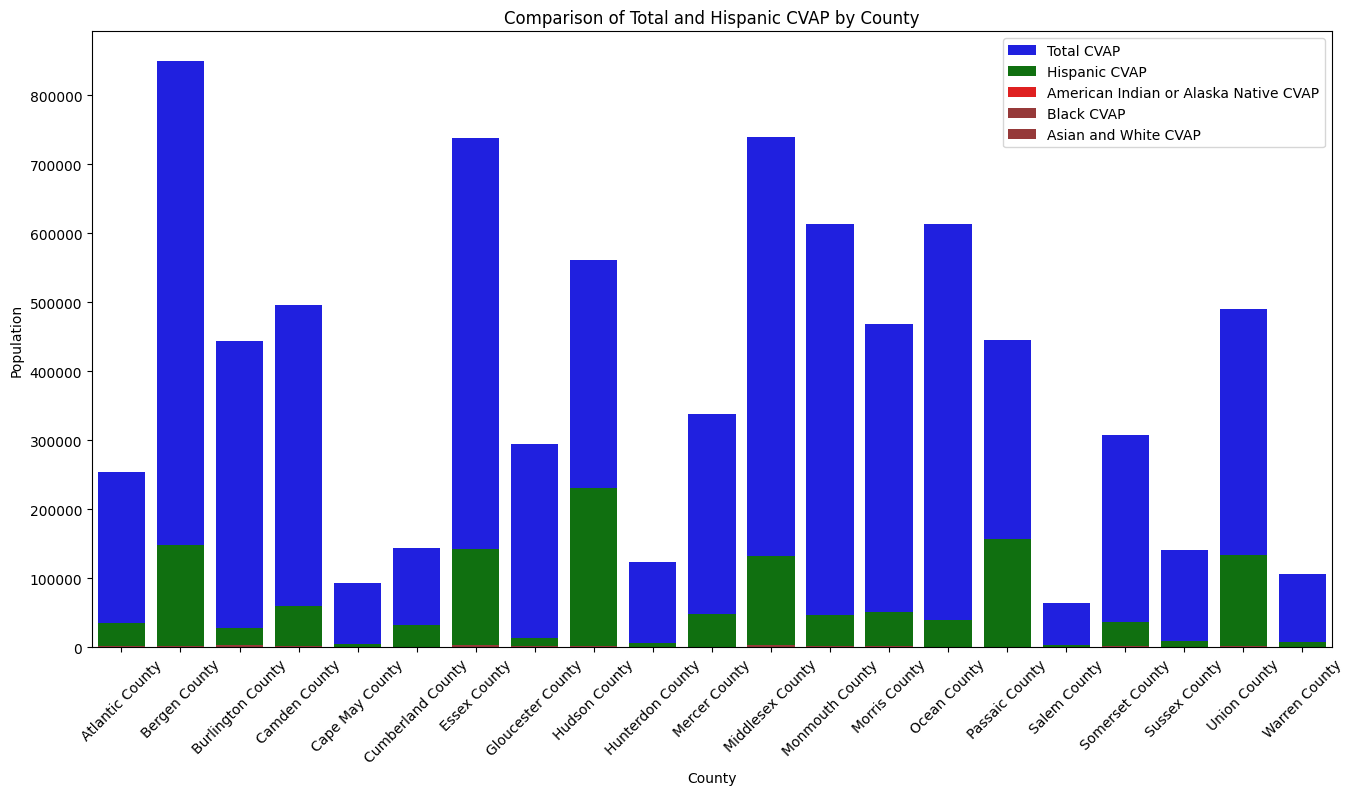

In [14]:
import pandas as pd

# Load the CVAP data
cvap_data = pd.read_csv('D:/OSNA/Project/nj_cvap_2021_cnty/nj_cvap_2021_cnty.csv')

# Display the first few rows of the dataframe and basic statistics to understand its structure
print(cvap_data.head())
print(cvap_data.describe())
# Check for missing values
print(cvap_data.isnull().sum())

# Summary statistics for numerical features
print(cvap_data.describe())
import matplotlib.pyplot as plt
import seaborn as sns

# 'C_TOT21' is the total Citizen Voting Age Population and other columns like 'VAP_HSP21' represent demographic subsets
# Replace 'VAP_HSP21' with the actual column names for Hispanic, Black, Asian, etc., populations

# Visualization of the total CVAP vs. Hispanic CVAP
plt.figure(figsize=(16, 8))
sns.barplot(x=cvap_data['COUNTY'], y=cvap_data['C_TOT21'], color='blue', label='Total CVAP')
sns.barplot(x=cvap_data['COUNTY'], y=cvap_data['VAP_HSP21'], color='green', label='Hispanic CVAP')
sns.barplot(x=cvap_data['COUNTY'], y=cvap_data['CVAP_AIB21'], color='red', label='American Indian or Alaska Native CVAP')
sns.barplot(x=cvap_data['COUNTY'], y=cvap_data['CVAP_BLW21'], color='brown', label='Black CVAP')
sns.barplot(x=cvap_data['COUNTY'], y=cvap_data['CVAP_ASW21'], color='brown', label='Asian and White CVAP')
plt.xlabel('County')
plt.ylabel('Population')
plt.title('Comparison of Total and Hispanic CVAP by County')
plt.legend()
plt.xticks(rotation=45)
plt.show()


## Employment Distribution Across Sectors in NJ 7th District

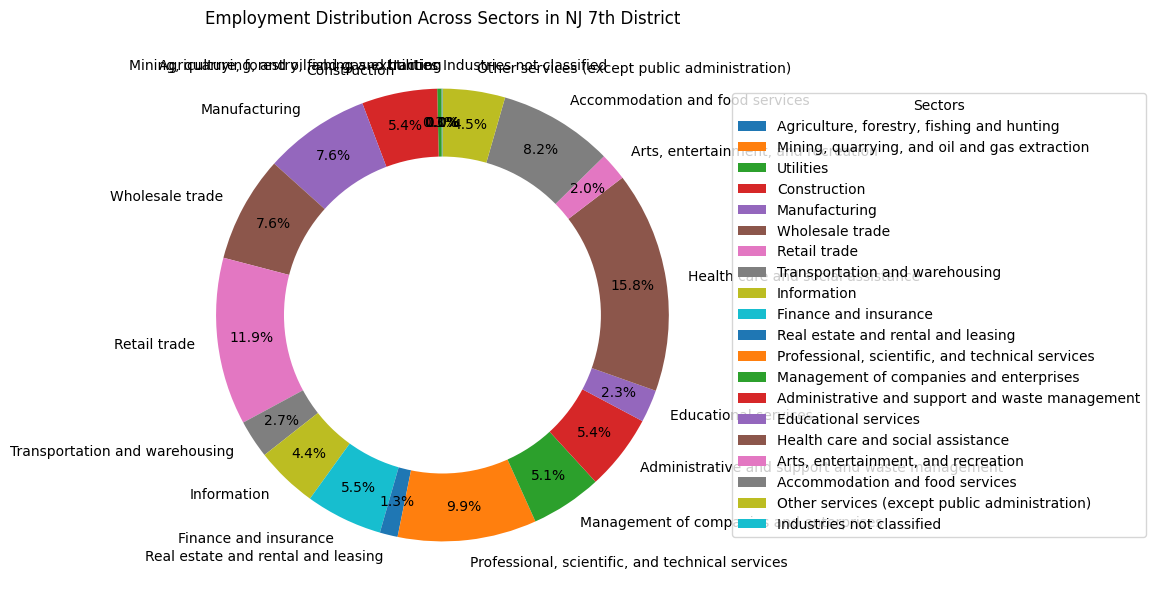

In [15]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a Pandas DataFrame
# Replace 'path/to/your/dataset.xlsx' with the actual file path
data = pd.read_excel('D:\OSNA\Project\Business_NJ7.xlsx')

# Exclude the total aggregate for all sectors to focus on individual sectors
sector_data = data[data['NAICS Description'] != 'Total for all sectors']

# Filter sectors with employment greater than 0 to avoid skewing the visualization
filtered_sector_data = sector_data[sector_data['Employment'] > 0]

# Create a pie chart to show the distribution of employment across sectors
fig, ax = plt.subplots(figsize=(10, 8))
filtered_sector_data.plot(kind='pie', y='Employment', labels=filtered_sector_data['NAICS Description'],
                          ax=ax, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Draw a circle at the center to make it a donut chart, which helps with readability
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Enhance the layout by adjusting the legend and plot title
ax.legend(title="Sectors", loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel('')  # Remove the label for the y-axis
ax.set_title('Employment Distribution Across Sectors in NJ 7th District')

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()


The pie chart illustrates the distribution of employment across various sectors within New Jersey's 7th Congressional District. Each sector's share of the total employment is shown, allowing you to see which sectors are the largest employers and potentially have a significant impact on the local economy.

Insights from the Visualization:
Dominant Sectors: Sectors that occupy larger portions of the pie are the district's key employers. These sectors could be critical for economic stability and growth within the district.
Minor Sectors: Smaller slices indicate sectors with less employment, which might be niche or emerging industries or those that require fewer employees due to automation or business nature.
This visualization helps in understanding the employment landscape and can serve as a basis for more detailed economic analysis, such as assessing sector vulnerabilities, growth potentials, or the need for economic diversification.

## Employment By Sector In NJ 7th District

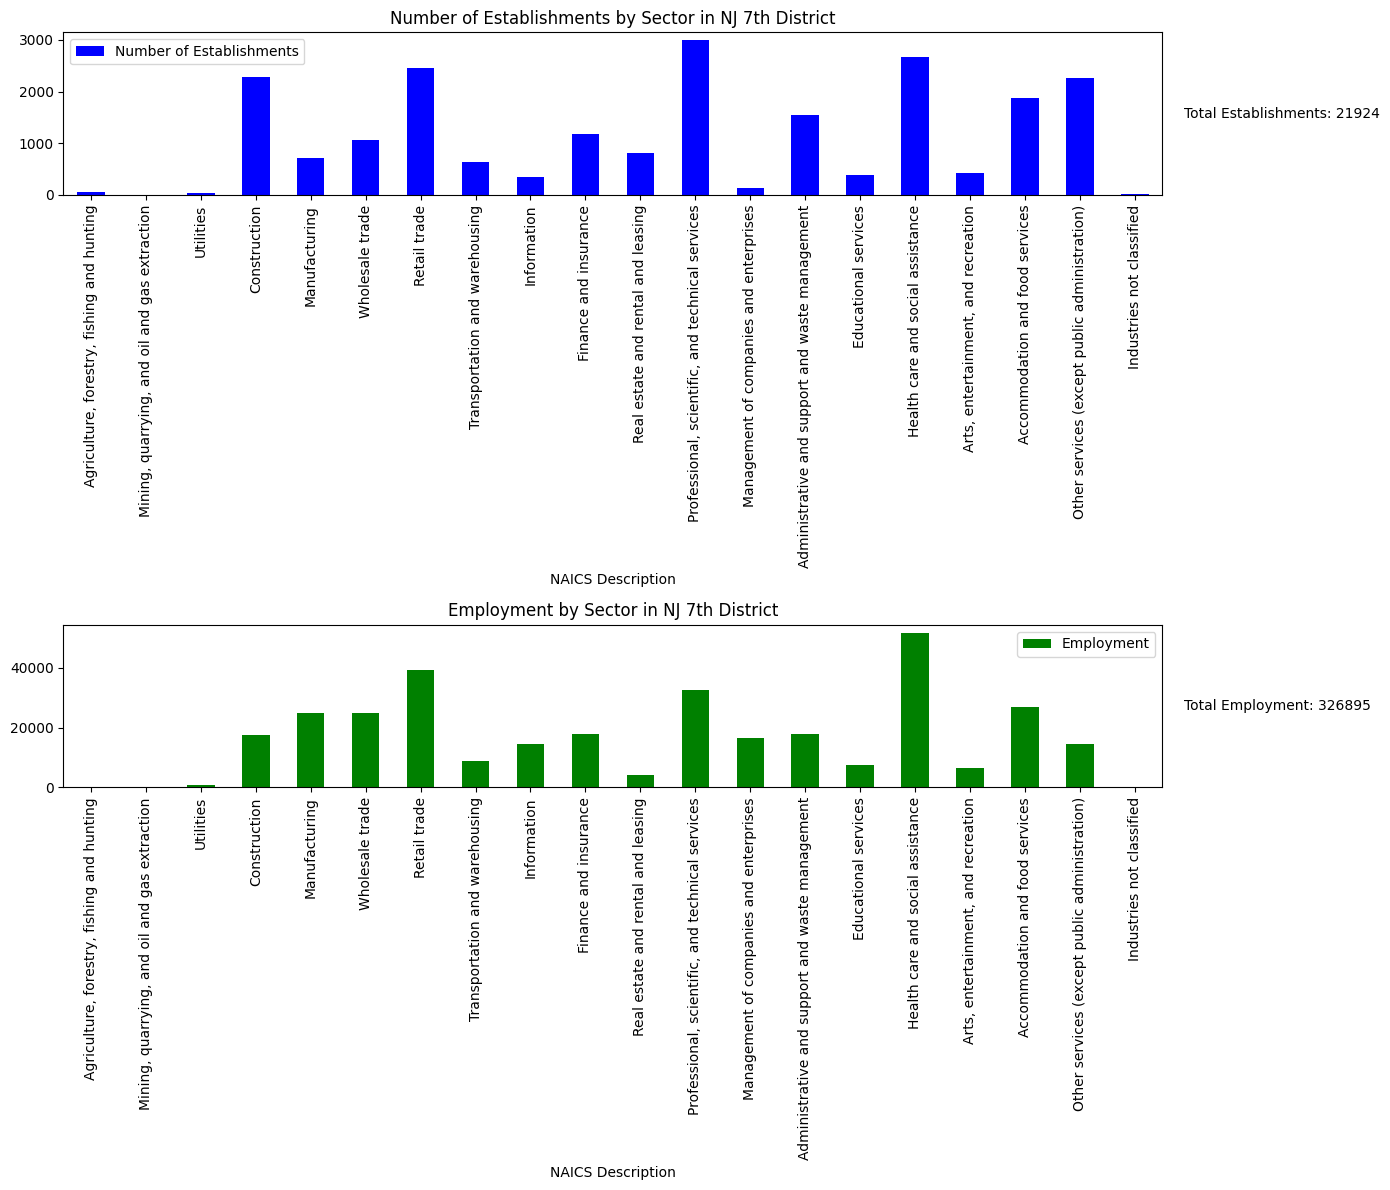

In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a Pandas DataFrame
# Replace 'path/to/your/dataset.xlsx' with the actual file path
data = pd.read_excel('D:\OSNA\Project\Business_NJ7.xlsx')

# Filter out the row for 'Total for all sectors' to focus on individual sectors
sector_data = data[data['NAICS Description'] != 'Total for all sectors']

# Create a figure to hold the plots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

# Bar Chart for Number of Establishments by NAICS Description
sector_data.plot(x='NAICS Description', y='Number of Establishments', kind='bar', ax=axes[0], color='blue', title='Number of Establishments by Sector in NJ 7th District')
# Add text on the side to display total establishments
axes[0].text(1.02, 0.5, f"Total Establishments: {data.loc[data['NAICS Description'] == 'Total for all sectors', 'Number of Establishments'].values[0]}", transform=axes[0].transAxes, verticalalignment='center')

# Bar Chart for Employment by NAICS Description
sector_data.plot(x='NAICS Description', y='Employment', kind='bar', ax=axes[1], color='green', title='Employment by Sector in NJ 7th District')
# Add text on the side to display total employment
axes[1].text(1.02, 0.5, f"Total Employment: {data.loc[data['NAICS Description'] == 'Total for all sectors', 'Employment'].values[0]}", transform=axes[1].transAxes, verticalalignment='center')

# Enhance layout for better readability
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()


Here are the visualizations for New Jersey's 7th Congressional District based on the recent dataset:

Number of Establishments by Sector (Top Chart): This bar graph displays the number of business establishments in each sector within the district. Sectors like Construction and Retail might show a higher number of establishments, reflecting a significant presence in the district's economy.

Employment by Sector (Bottom Chart): This graph illustrates the employment levels in each sector. Sectors with higher employment contribute significantly to the district's job market and economic activity.

These charts provide a clear picture of the economic distribution and labor involvement in NJ's 7th District, helping to understand which sectors are most influential. 

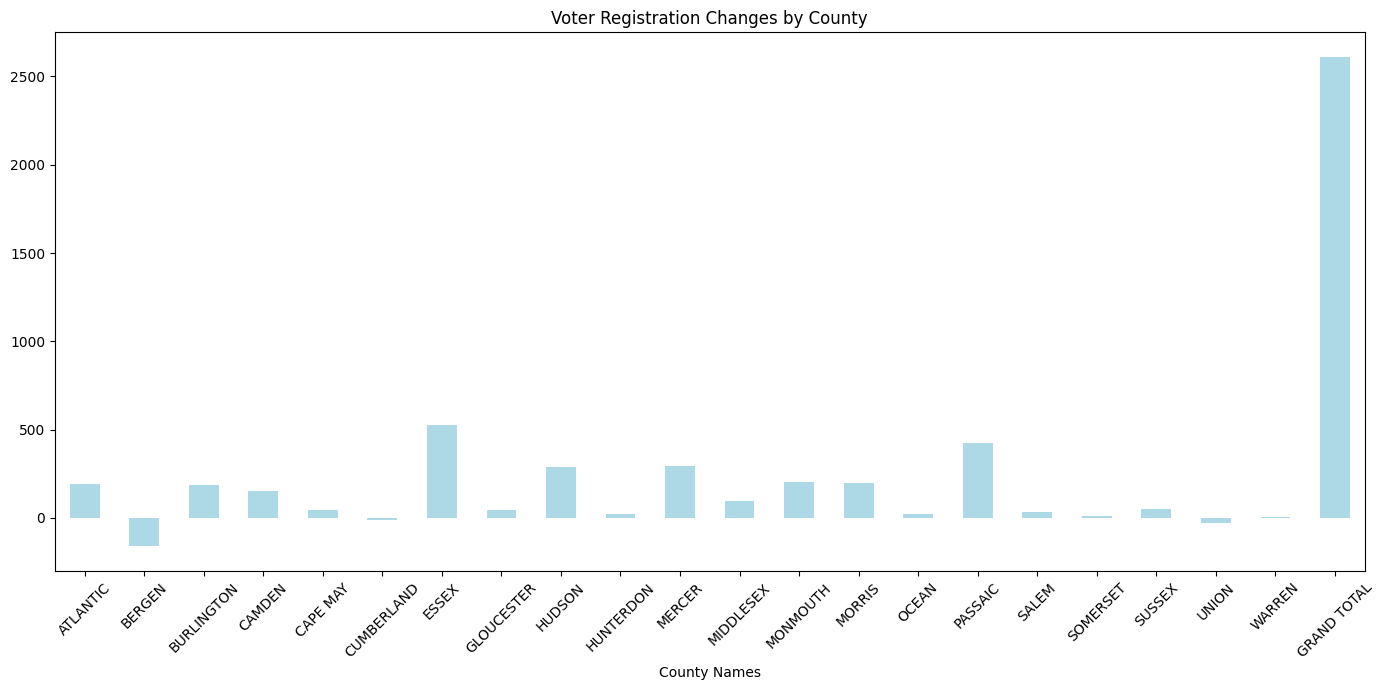

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
data_general_county = pd.read_excel('D:/OSNA/Project/2024 General Election Day Voter Registration by County.xlsx')
data_november_county = pd.read_excel('D:/OSNA/Project/November 2024 Voter Registration by County.xlsx')

# Standardize the county identifiers and column names if necessary
data_general_county.rename(columns={"County": "County Names"}, inplace=True)
data_november_county.rename(columns={"County": "County Names"}, inplace=True)
data_general_county['County Names'] = data_general_county['County Names'].str.upper().str.strip()
data_november_county['County Names'] = data_november_county['County Names'].str.upper().str.strip()

# Calculate changes in voter registration by county
county_changes = data_general_county.set_index('County Names').subtract(data_november_county.set_index('County Names'), fill_value=0)

# Create a figure to hold the plots
fig, ax = plt.subplots(figsize=(14, 7))

# Bar Chart for Voter Registration Changes by County
county_changes['Total'].plot(kind='bar', ax=ax, color='lightblue', title='Voter Registration Changes by County')

# Enhance layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Here's the visualization showing the voter registration changes by county from General Election Day to November 2024. The bar chart clearly displays each county along the x-axis with the total change in voter registration represented on the y-axis.

Key Observations:
Positive Values: Counties where the bars rise above the baseline show an increase in voter registration, which could be due to successful registration drives or population growth.
Negative Values: Any bars dipping below the baseline indicate a decrease in voter registrations, which might be due to population shifts or other demographic changes.
This visualization helps identify which counties are experiencing significant changes in voter registration, providing insights that can be crucial for campaign strategies or resource allocation for the elections.

## Voter Registration Changes

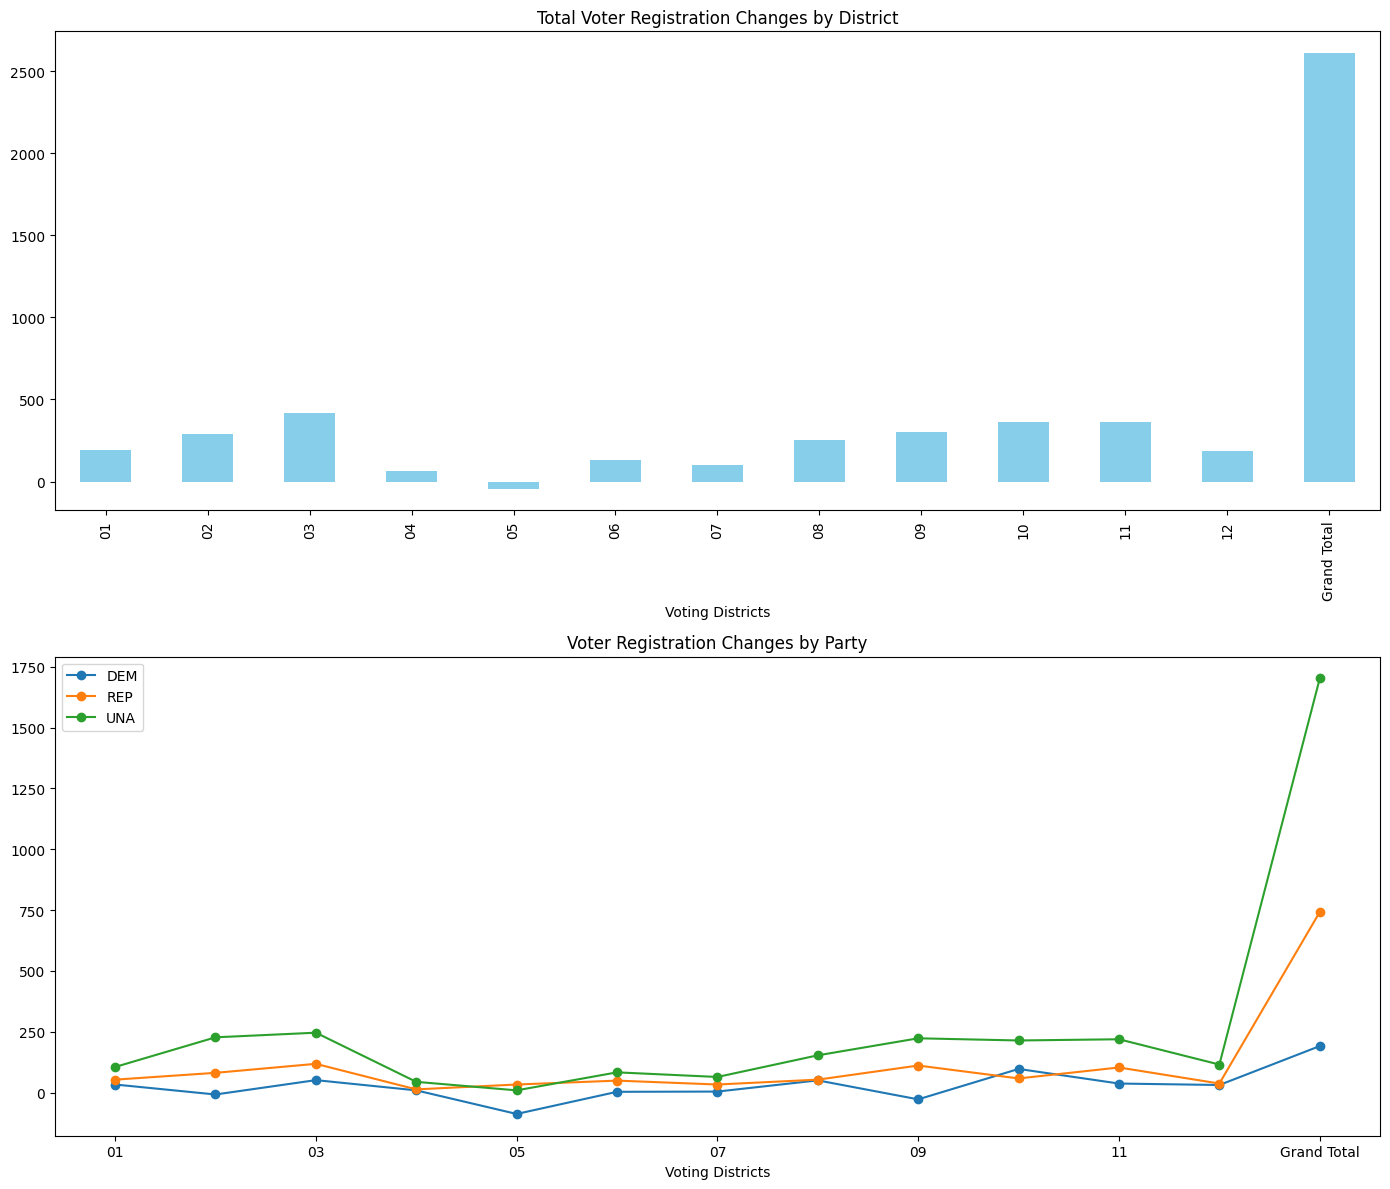

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
data_general = pd.read_excel('D:/OSNA/Project/2024 General Election Day Voter Registration by Congressional Voting District.xlsx')
data_november = pd.read_excel('D:/OSNA/Project/November 2024 Voter Registration by Congressional Voting District.xlsx')


# Standardize the district identifiers and column names
data_general.rename(columns={"Districts": "Voting Districts"}, inplace=True)
data_november.rename(columns={"Districts": "Voting Districts"}, inplace=True)
data_general['Voting Districts'] = data_general['Voting Districts'].astype(str).str.zfill(2)
data_november['Voting Districts'] = data_november['Voting Districts'].astype(str).str.zfill(2)


# Calculate changes in voter registration
changes = data_general.set_index('Voting Districts').subtract(data_november.set_index('Voting Districts'), fill_value=0)

# Create a figure to hold the plots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

# Bar Chart for Voter Registration Changes by District
changes['Total'].plot(kind='bar', ax=axes[0], color='skyblue', title='Total Voter Registration Changes by District')

# Line Graph for Voter Registration Changes Over Different Parties
changes[['DEM', 'REP', 'UNA']].plot(kind='line', ax=axes[1], marker='o', title='Voter Registration Changes by Party')

# Enhance layout
plt.tight_layout()
plt.show()



Here are the visualizations depicting voter registration changes by district and party:

Bar Chart (Top): Shows the total voter registration changes by district, providing a clear comparison across all districts. Positive values indicate an increase in registration, while any district with negative values (if present) would indicate a decrease.

Line Graph (Bottom): Displays the changes in voter registration for the Democratic (DEM), Republican (REP), and Unaffiliated (UNA) parties across different districts. This graph highlights trends in party affiliations, showing which parties are gaining or losing registrants in specific areas.

These visualizations help us quickly identify which districts and parties are experiencing the most significant changes in voter registration as the 2024 election approaches.

## Correlation between Demographic Factors and Party Affiliations

Available columns in the pivoted demographics data:
['18 years and over', '65 years and over', 'All families', 'All people', 'Families with female householder, no spouse present', 'Married couple families', 'Median age (years)', 'Native Hawaiian and Other Pacific Islander', 'People in families', "Percent bachelor's degree or higher", 'Percent high school graduate or higher', 'Related children of the householder 5 to 17 years', 'Related children of the householder under 18 years', 'Related children of the householder under 5 years', 'Under 18 years', 'Unrelated individuals 15 years and over', 'With related children of the householder under 18 years', 'With related children of the householder under 5 years only']


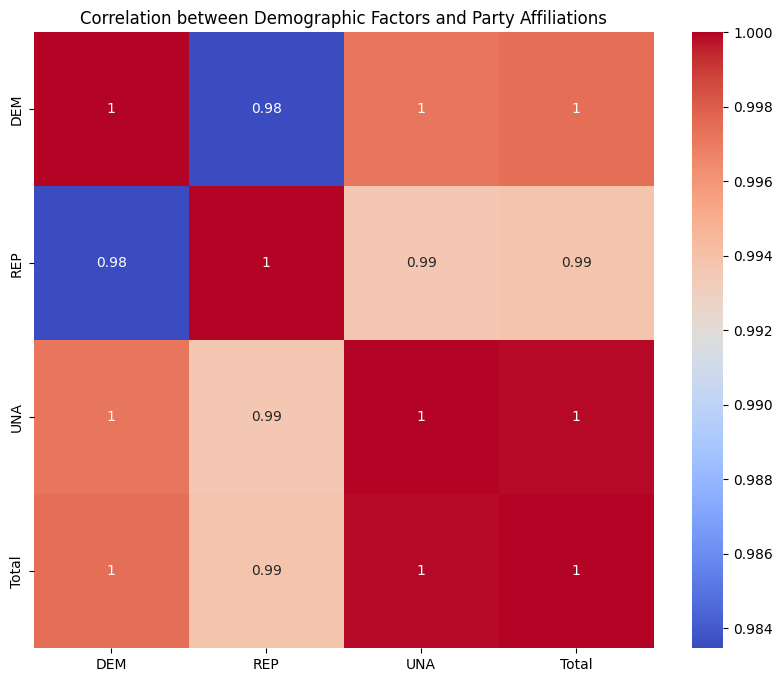

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the demographics and voter registration datasets
demographics = pd.read_csv("D:/OSNA/Project/Demographics data/NJ7_demogrphics.csv")
voter_registration = pd.read_excel("D:/OSNA/Project/2024 General Election Day Voter Registration by Congressional Voting District.xlsx")

# Filter demographics data to relevant topics and ensure no missing values in key columns
demographics_filtered = demographics[
    demographics['Topic'].isin(['People', 'Socioeconomic', 'Education'])
].dropna(subset=['Title', 'District 07 Estimate'])

# Convert 'District 07 Estimate' to numeric, replacing non-numeric entries
demographics_filtered['District 07 Estimate'] = pd.to_numeric(demographics_filtered['District 07 Estimate'], errors='coerce')

# Pivot the demographics data to have demographic attributes as columns, filling any missing values
demographics_pivot = demographics_filtered.pivot_table(index=None, columns='Title', values='District 07 Estimate', aggfunc='first')

# Print available columns to check exact titles
print("Available columns in the pivoted demographics data:")
print(demographics_pivot.columns.tolist())

# Merge with voter registration data on district identifiers
voter_registration = voter_registration.rename(columns={"Districts": "District"})  # Rename for consistency
merged_data = pd.concat([voter_registration.reset_index(drop=True), demographics_pivot.reset_index(drop=True)], axis=1)

# Update the columns list based on exact available titles from the output above
columns = ['DEM', 'REP', 'UNA', 'Total']  # Include additional column names based on available columns in demographics_pivot
correlation_data = merged_data[columns].dropna()  # Drop rows with missing values

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Demographic Factors and Party Affiliations")
plt.show()



## Analysis of this demographics dataset

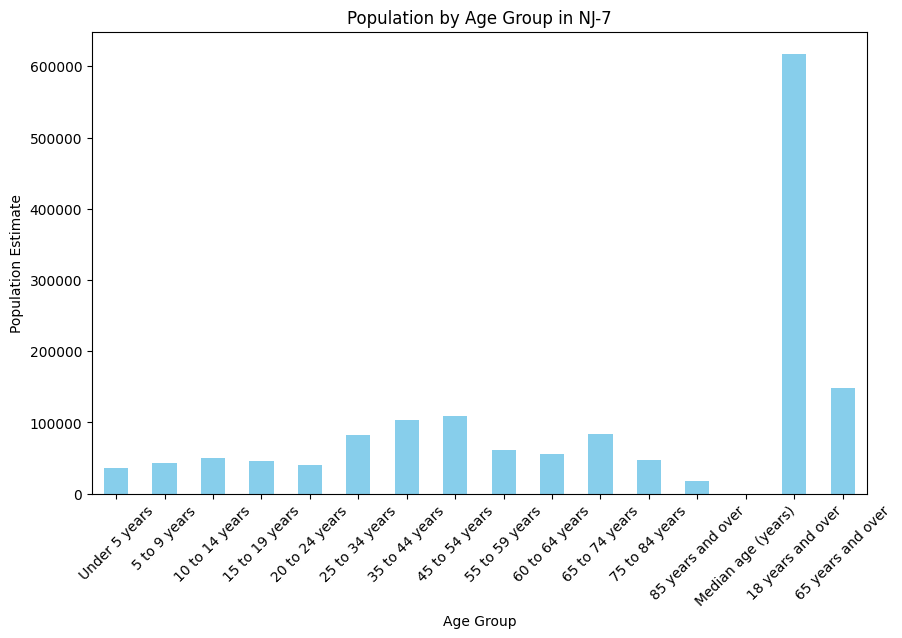

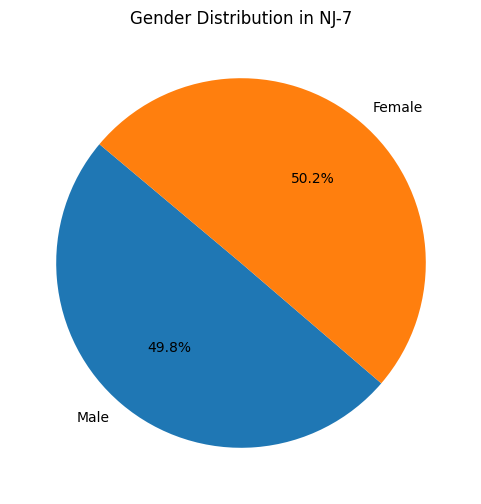

Summary of NJ-7 Demographic Data:
Total Population: 778678.0
Male Population: 387973.0
Female Population: 390705.0


Title
Under 5 years          35883.0
5 to 9 years           43111.0
10 to 14 years         50796.0
15 to 19 years         45356.0
20 to 24 years         40677.0
25 to 34 years         82615.0
35 to 44 years        103920.0
45 to 54 years        109673.0
55 to 59 years         61679.0
60 to 64 years         56324.0
65 to 74 years         83147.0
75 to 84 years         47891.0
85 years and over      17606.0
Median age (years)        43.7
18 years and over     617606.0
65 years and over     148644.0
Name: District 07 Estimate, dtype: float64

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load demographics dataset
demographics_data = pd.read_csv("D:/OSNA/Project/Demographics data/NJ7_demogrphics.csv")

# Remove any non-numeric rows from "District 07 Estimate" and clean the data
# Convert commas to empty strings and remove rows where conversion to float fails
demographics_data['District 07 Estimate'] = (
    demographics_data['District 07 Estimate']
    .str.replace(',', '', regex=False)
    .apply(pd.to_numeric, errors='coerce')  # Convert to numeric, setting non-numeric as NaN
)

# Drop rows with NaN in "District 07 Estimate" column after conversion
demographics_data = demographics_data.dropna(subset=['District 07 Estimate'])

# Filter data to focus on relevant demographic groups (e.g., age, gender)
age_data = demographics_data[demographics_data['Subject'] == 'Sex and Age']

# Separate data into relevant categories
total_population = age_data[age_data['Title'] == 'Total population']['District 07 Estimate'].values[0]
male_population = age_data[age_data['Title'] == 'Male']['District 07 Estimate'].values[0]
female_population = age_data[age_data['Title'] == 'Female']['District 07 Estimate'].values[0]

# Extract age-specific groups
age_groups = age_data[~age_data['Title'].isin(['Total population', 'Male', 'Female'])]
age_groups = age_groups.set_index('Title')['District 07 Estimate']

# Plot demographics for Age Groups in NJ-7
plt.figure(figsize=(10, 6))
age_groups.plot(kind='bar', color='skyblue')
plt.title("Population by Age Group in NJ-7")
plt.xlabel("Age Group")
plt.ylabel("Population Estimate")
plt.xticks(rotation=45)
plt.show()

# Gender Distribution Pie Chart
plt.figure(figsize=(6, 6))
plt.pie([male_population, female_population], labels=['Male', 'Female'], autopct='%1.1f%%', startangle=140)
plt.title("Gender Distribution in NJ-7")
plt.show()

# Summary statistics of demographic data
print("Summary of NJ-7 Demographic Data:")
print(f"Total Population: {total_population}")
print(f"Male Population: {male_population}")
print(f"Female Population: {female_population}")

# Display age group data for reference
age_groups


## Voter Registration Trends by Party and District

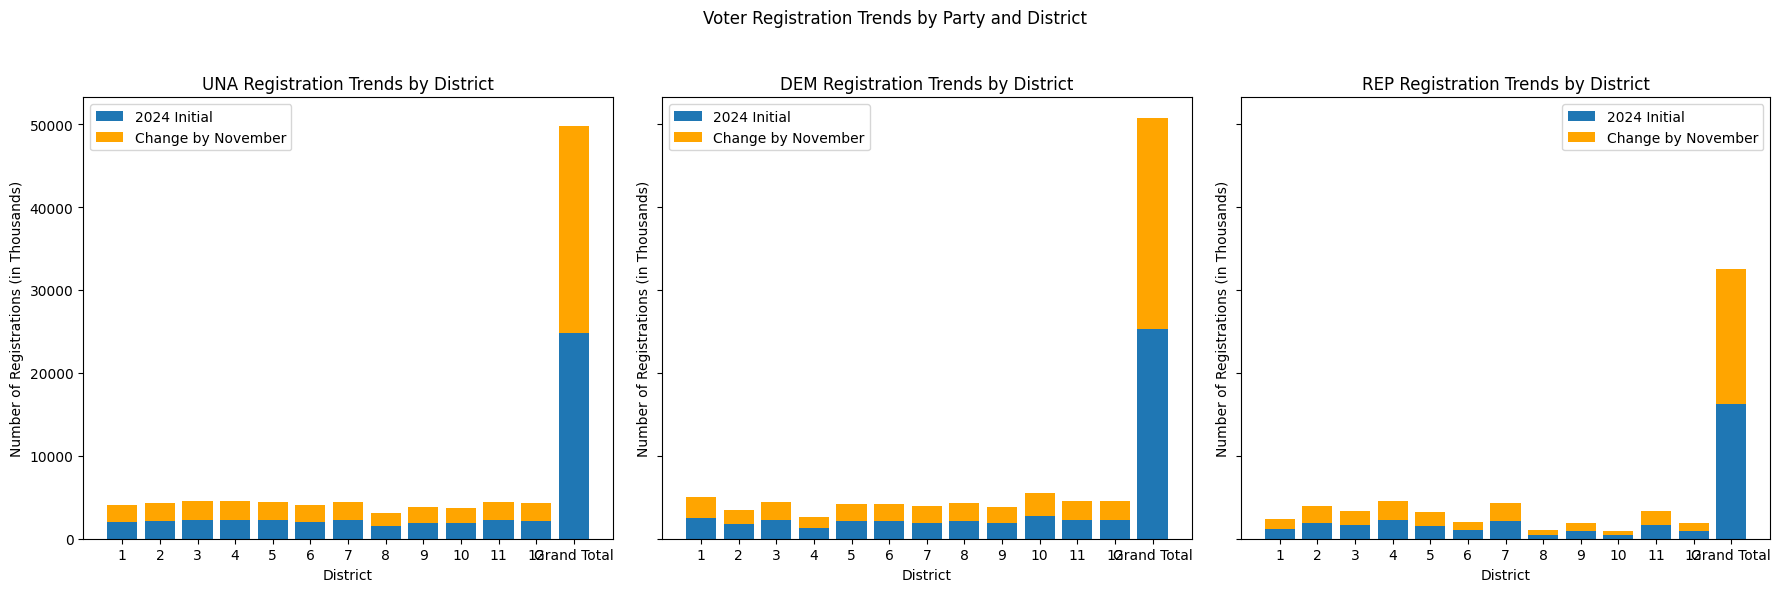

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
district_registration = pd.read_excel("D:/OSNA/Project/2024 General Election Day Voter Registration by Congressional Voting District.xlsx")
november_district_registration = pd.read_excel("D:/OSNA/Project/November 2024 Voter Registration by Congressional Voting District.xlsx")

# Rename columns for consistency
district_registration = district_registration.rename(columns={"Districts": "District"})
november_district_registration = november_district_registration.rename(columns={"Voting Districts": "District"})

# Standardize district names (strip leading zeros and convert to string)
district_registration['District'] = district_registration['District'].astype(str).str.lstrip('0')
november_district_registration['District'] = november_district_registration['District'].astype(str).str.lstrip('0')

# Select relevant columns and set index
district_registration_summary = district_registration[['District', 'UNA', 'DEM', 'REP', 'Total']].set_index('District')
november_district_registration_summary = november_district_registration[['District', 'UNA', 'DEM', 'REP', 'Total']].set_index('District')

# Scale values to thousands for better readability
district_registration_summary /= 100
november_district_registration_summary /= 100

# Plot voter registration trends by district and party
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
parties = ['UNA', 'DEM', 'REP']
for i, party in enumerate(parties):
    axes[i].bar(district_registration_summary.index, district_registration_summary[party], label="2024 Initial")
    axes[i].bar(november_district_registration_summary.index, november_district_registration_summary[party], 
                bottom=district_registration_summary[party], label="Change by November", color="orange")
    axes[i].set_title(f"{party} Registration Trends by District")
    axes[i].set_xlabel("District")
    axes[i].set_ylabel("Number of Registrations (in Thousands)")
    axes[i].legend()

plt.suptitle("Voter Registration Trends by Party and District")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


The voter registration trends by district and party are now visualized, showing initial registrations alongside changes by November 2024 for unaffiliated (UNA), Democratic (DEM), and Republican (REP) voters. This visualization can help assess shifts in voter alignment and participation across different districts, which can be a significant factor in predicting election outcomes.